<a href="https://colab.research.google.com/github/claudiomluz/sprint-machine-learning-and-analytics/blob/main/mvp_puc_rj_machine_learning_and_analytics_claudio_luz_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Machine Learning e Analytics
## Profs. Tatiana Escovedo e Hélio Lopes

### Curso: Pós Graduação em Análise de Dados e Analytics - PUC-RJ ([link](https://especializacao.ccec.puc-rio.br/especializacao/ciencia-de-dados-e-analytics))
### Aluno: Cláudio de Miranda Luz ([Linkedin](https://www.linkedin.com/in/claudiomluz/))



### Estrutura

Este MVP dará continuidade ao [MVP](https://colab.research.google.com/drive/1fmmg43PQvAndZetGESgL6SdjDbiezl1y) entregue no módulo anterior do curso. No entanto, enquanto no anterior o foco foi em atividades de pré-processamento de dados e visualização, desta vez o foco será em técnicas de machine learning e nos seus resultados.


## 1. Definição do Problema

A plataforma **Airbnb** é um dos maiores exemplos de serviço de **economia compartilhada**. Proprietários ou administradores de imóveis podem oferecer acomodações de modo a obter retorno financeiro e hóspedes podem encontrar uma variedade de opções que atendam suas expectativas de experiência de hospedagem. O serviço possibilita o encontro dessas duas personas com cada um buscando seus melhores interesses.

No contexto de economia compartilhada, do ponto de vista da plataforma e do administrador do bem, uma **métrica** que pode ser um dos indicadores de melhor retorno de investimento seria a **taxa de ocupação**. No caso do Airbnb e de acomodações, quanto mais dias hóspedes estiverem usufruindo do bem, mais valor está sendo gerado para todas as partes envolvidas.

Minha proposta nesse trabalho é analisar dados da plataforma Airbnb referentes a acomodações na cidade do **Rio de Janeiro**. O dataset usado neste projeto é proveniente do site [Inside Airbnb](http://insideairbnb.com/) e contém dados extraídos na data de 23 de setembro de 2023, o mesmo usado no MVP anterior do curso.

O **problema** que quero resolver é identificar as acomodações com melhores taxas de ocupação (P90) e depois criar um modelo que me permita inferir que uma acomodação pertence a esse grupo. Portanto, esse problema se encaixa na categoria de **aprendizado supervisionado** num cenário de **classificação**, pois pretendo inferir uma categoria a partir de valores de outras variáveis do dataset.

O dataset não contém diretamente um dado de taxa de ocupação então usarei outra variável, ligada a quantidade de avaliações da acomodação, como **variável proxy** para fazer a leitura da taxa de ocupação.

Tenho diversas **hipóteses** relacionadas ao tema, na relação de influência entre os dados e a variável alvo. Seguem algumas:

*   o bairro onde se localiza uma acomodação influencia na sua taxa de ocupação;
*   imóveis menores tem taxa de ocupação mais alta do que os maiores;
*   o comportamento do anfitrião influencia na taxa de ocupação.
*   algumas poucas variáveis tem muita influência na taxa de ocupação enquanto a maioria influencia pouco.

Ao longo do notebook farei a análise destas e de outras hipóteses sobre o tema.

Vou me referenciar aos imóveis ou quartos sempre chamando-os de **acomodação** e chamarei de **anfitrião** a pessoa que publicou a acomodação na plataforma Airbnb, seja ela proprietária ou não da acomodação.

O **dicionário de dados** sobre o dataset estará escrito no meio do notebook, após as etapas de limpeza iniciais, onde dados menos relevantes serão descartados numa abordagem de feature selection não supervisionada. Serão enumerados e descritos no dicionário os dados originais mantidos e aqueles novos, gerados por enriquecimento, e que serão analisados mais profundamente nas sessões subsequentes.

Escolhi esse dataset por ser uma ótima opção para exercitar os conceitos aprendidos na disciplina. Ele contém dados numéricos, textuais, categóricos, datas e booleanos, além de ter dimensões interessantes. Aplicarei as técnicas de pré-processamento aprendidas no módulo anterior do curso e principalmente as técnicas de machine learning para chegar no melhor resultado de classificação.

## 2. Configurações iniciais

Criei essa seção para agregar configurações iniciais do notebook.

### 2.1 Imports

In [166]:
# Importação de pacotes usados no notebook
import requests  # coleta de arquivos
import gzip  # descompactação de arquivos
import pandas as pd  # para análise de dados
import numpy as np
import missingno as ms  # para tratamento de missings
import warnings  # Pacote usado para configuração de warnings
from typing import List, Dict  # para usar em annotations de PEP 484
import json  # para interpretar listas que estão como string
import matplotlib.pyplot as plt  # pacotes de visualização
from sklearn.model_selection import train_test_split  # pacotes para holdout
from sklearn.preprocessing import MinMaxScaler  # normalização
from sklearn.preprocessing import StandardScaler  # padronização
from sklearn.preprocessing import OrdinalEncoder  # ordinal encoding
from sklearn.preprocessing import OneHotEncoder  # one-hot e dummy encoding
from sklearn.preprocessing import LabelEncoder # Label Encoder

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.inspection import permutation_importance

# configuração para não exibir os warnings
warnings.filterwarnings("ignore")

### 2.2 Constantes

In [167]:
# Constantes que armazenanam os nomes de cada um dos atributos do dataset

# nomes originais das variáveis presentes no dataset
ID = 'id'
LISTING_URL = 'listing_url'
SCRAPE_ID = 'scrape_id'
LAST_SCRAPED = 'last_scraped'
SOURCE = 'source'
NAME = 'name'
DESCRIPTION = 'description'
NEIGHBORHOOD_OVERVIEW = 'neighborhood_overview'
PICTURE_URL = 'picture_url'
HOST_ID = 'host_id'
HOST_URL = 'host_url'
HOST_NAME = 'host_name'
HOST_SINCE = 'host_since'
HOST_LOCATION = 'host_location'
HOST_ABOUT = 'host_about'
HOST_RESPONSE_TIME = 'host_response_time'
HOST_RESPONSE_RATE = 'host_response_rate'
HOST_ACCEPTANCE_RATE = 'host_acceptance_rate'
HOST_IS_SUPERHOST = 'host_is_superhost'
HOST_THUMBNAIL_URL = 'host_thumbnail_url'
HOST_PICTURE_URL = 'host_picture_url'
HOST_NEIGHBOURHOOD = 'host_neighbourhood'
HOST_LISTINGS_COUNT = 'host_listings_count'
HOST_TOTAL_LISTINGS_COUNT = 'host_total_listings_count'
HOST_VERIFICATIONS = 'host_verifications'
HOST_HAS_PROFILE_PIC = 'host_has_profile_pic'
HOST_IDENTITY_VERIFIED = 'host_identity_verified'
NEIGHBOURHOOD = 'neighbourhood'
NEIGHBOURHOOD_CLEANSED = 'neighbourhood_cleansed'
NEIGHBOURHOOD_GROUP_CLEANSED = 'neighbourhood_group_cleansed'
LATITUDE = 'latitude'
LONGITUDE = 'longitude'
PROPERTY_TYPE = 'property_type'
ROOM_TYPE = 'room_type'
ACCOMMODATES = 'accommodates'
BATHROOMS = 'bathrooms'
BATHROOMS_TEXT = 'bathrooms_text'
BEDROOMS = 'bedrooms'
BEDS = 'beds'
AMENITIES = 'amenities'
PRICE = 'price'
MINIMUM_NIGHTS = 'minimum_nights'
MAXIMUM_NIGHTS = 'maximum_nights'
MINIMUM_MINIMUM_NIGHTS = 'minimum_minimum_nights'
MAXIMUM_MINIMUM_NIGHTS = 'maximum_minimum_nights'
MINIMUM_MAXIMUM_NIGHTS = 'minimum_maximum_nights'
MAXIMUM_MAXIMUM_NIGHTS = 'maximum_maximum_nights'
MINIMUM_NIGHTS_AVG_NTM = 'minimum_nights_avg_ntm'
MAXIMUM_NIGHTS_AVG_NTM = 'maximum_nights_avg_ntm'
CALENDAR_UPDATED = 'calendar_updated'
HAS_AVAILABILITY = 'has_availability'
AVAILABILITY_30 = 'availability_30'
AVAILABILITY_60 = 'availability_60'
AVAILABILITY_90 = 'availability_90'
AVAILABILITY_365 = 'availability_365'
CALENDAR_LAST_SCRAPED = 'calendar_last_scraped'
NUMBER_OF_REVIEWS = 'number_of_reviews'
NUMBER_OF_REVIEWS_LTM = 'number_of_reviews_ltm'
NUMBER_OF_REVIEWS_L30D = 'number_of_reviews_l30d'
FIRST_REVIEW = 'first_review'
LAST_REVIEW = 'last_review'
REVIEW_SCORES_RATING = 'review_scores_rating'
REVIEW_SCORES_ACCURACY = 'review_scores_accuracy'
REVIEW_SCORES_CLEANLINESS = 'review_scores_cleanliness'
REVIEW_SCORES_CHECKIN = 'review_scores_checkin'
REVIEW_SCORES_COMMUNICATION = 'review_scores_communication'
REVIEW_SCORES_LOCATION = 'review_scores_location'
REVIEW_SCORES_VALUE = 'review_scores_value'
LICENSE = 'license'
INSTANT_BOOKABLE = 'instant_bookable'
CALCULATED_HOST_LISTINGS_COUNT = 'calculated_host_listings_count'
CALCULATED_HOST_LISTINGS_COUNT_ENTIRE_HOMES = ('calculated_host_listings_'
                                               'count_entire_homes')
CALCULATED_HOST_LISTINGS_COUNT_PRIVATE_ROOMS = ('calculated_host_listings_'
                                                'count_private_rooms')
CALCULATED_HOST_LISTINGS_COUNT_SHARED_ROOMS = ('calculated_host_listings_'
                                               'count_shared_rooms')
REVIEWS_PER_MONTH = 'reviews_per_month'

# nomes de variáveis novas criadas no dataset
HOST_LOCATION_ADJUSTED = 'host_location_adjs'
HOST_PROXIMITY = 'host_proximity'
HAS_HOST_ABOUT = 'has_host_about'
BEDROOMS_ADPT = 'bedrooms_adpt'
BEDS_ADPT = 'beds_adpt'
AMENITIES_COUNT = 'amenities_count'
MONTHS_SINCE_REGISTERED = 'months_since_registered'
HAS_NEIGHBOURHOOD_OVERVIEW = 'has_neighbourhood_overview'
BATHS_INDEX = 'baths_index'
BATHS_CATEGORY = 'baths_category'
BEST_PLAYER = 'best_player'

# descrições da cidade do Rio de Janeiro
RIO_DE_JANEIRO_DESCRIPTION = 'Rio de Janeiro, Brazil'
RIO_DE_JANEIRO_DESCRIPTION_ALT = 'Rio, Brazil'

# categorias de tipo de quarto
ROOMTYPE_ENTIRE = 'Entire home/apt'
ROOMTYPE_PRIVATE = 'Private room'
ROOMTYPE_SHARED = 'Shared room'
ROOMTYPE_HOTEL = 'Hotel room'

# categorias de banheiros
BATHROOM_DEDICATED = 'dedicated'
BATHROOM_SHARED = 'shared'
BATHROOM_NOT_PRESENT = 'no_bathroom'

# categorias de proximadade do host
HOST_PROXIMITY_VERYCLOSE = 'Very Close'
HOST_PROXIMITY_RELATIVELYCLOSE = 'Relatively Close'
HOST_PROXIMITY_FAR = 'far'
HOST_PROXIMITY_NOINFO = 'No Information'

### 2.3 Funções

#### 2.3.1 bathroom

In [168]:
def get_bathrooms_index(row : pd.core.series.Series) -> float:
    '''
      Esse método visa transformar valores do campo bathrooms_text em um valor
      númerico com regras específicas
    '''
    texto_banheiros = row[BATHROOMS_TEXT]

    if pd.isna(texto_banheiros):
        return 0.0

    hospedes = row[ACCOMMODATES]

    lista = texto_banheiros.split()
    banheiros = 0.0

    try:
        # para a maioria dos casos o primeiro elemento da lista será um numeral
        banheiros = float(lista[0])
    except ValueError:
        # todos os casos em que o primeiro elemento da lista não é um número se
        # enquadram no cenário de half-bath (Half-bath, Shared half-bath e
        # Private half-bath)
        # vou assumir valor 0.5 para esses cenários
        banheiros = 0.5

    if banheiros == 0.0:
        return 0.0

    if 'shared' in texto_banheiros.lower():
        hospedes += 1

    return banheiros/hospedes

def get_bathrooms_category(row : pd.core.series.Series) -> str:
    '''
    Esse método visa interpretar o dado de banheiro e informar uma categoria
    entre dedicated, shared, ou no_bathroom
    '''
    texto_banheiros = row[BATHROOMS_TEXT]

    if pd.isna(texto_banheiros):
        return BATHROOM_NOT_PRESENT

    if 'shared' in texto_banheiros.lower():
        return BATHROOM_SHARED

    return BATHROOM_DEDICATED

#### 2.3.2 bedroom

In [169]:
def get_bedrooms_adjusted_value(row) -> float:
    '''
    Esse método visa transformar valores do campo bedrooms em um valor
    númerico com regras específicas
    '''
    # quantidade de quartos do objeto
    bedrooms_value = row[BEDROOMS]

    # verificando se tem valor nulo para aplicar regras
    if pd.isna(bedrooms_value):
        roomtype_value = row[ROOM_TYPE]

        if roomtype_value == ROOMTYPE_SHARED:
            # se for quarto compartilhado retorno a fração
            return 1 / row[ACCOMMODATES]
        else:
            return 1
    else:
        # se não for nulo retorno o próprio valor
        return bedrooms_value

#### 2.3.3 beds

In [170]:
def get_beds_adjusted_value_by_roomtype(row : pd.core.series.Series ,\
                                        medias : Dict) -> float:
    '''
    Esse método visa preencher valores para o campo beds que estejam nulos
    usando a média de acordo com o tipo de acomodação
    '''
    # quantidade de camas do objeto
    beds_value = row[BEDS]

    # verificando se tem valor nulo para aplicar regras
    if pd.isna(beds_value):
        # retornando a média de camas de acordo com o tipo de acomodacao
        return medias.get(row[ROOM_TYPE])
    else:
        # se não for nulo retorno o próprio valor
        return beds_value

#### 2.3.4 amenities

In [171]:
def get_amenities_count(row : pd.core.series.Series) -> float:
    '''
    Esse método visa converter a lista de comodidades num número que indique
    a quantidade de itens
    '''
    # lista de comodidades
    amenities = row[AMENITIES]

    # verificando se tem valor nulo para aplicar regras
    if pd.isna(amenities):
        # retornando 0 se for nulo
        return 0.0
    else:
        # se não for nulo retorno a quantidade de itens da lista
        return len(json.loads(amenities))

#### 2.3.5 reviews

In [172]:
def calcula_meses_desde_registro(row : pd.core.series.Series) -> int:
    '''
    Calcular a quantidade de meses desde o registro de uma acomodação a partir
    de valores de number_of_reviews e reviews_per_month
    '''
    resultado_float = row[NUMBER_OF_REVIEWS]/row[REVIEWS_PER_MONTH]
    return round(resultado_float)


#### 2.3.6 host_location

In [173]:
def fill_in_rio(row : pd.core.series.Series, bairros_referencia : List) -> str:
  '''
  Essa função visa preencher o valor que representa a cidade do Rio de Janeiro
  nos casos pertinentes
  '''
  if row[HOST_LOCATION] is np.NaN:
      # lista de bairros foi carregada na variável bairros_referencia na seção
      # da Entidade Localização da Acomodação
      if row[HOST_NEIGHBOURHOOD] in bairros_referencia:
          return RIO_DE_JANEIRO_DESCRIPTION
  return row[HOST_LOCATION]

def host_proximity(row : pd.core.series.Series) -> str:
    '''
    Essa função visa criar uma nova variável com categorias que indiquem
    proximidade do host com a acomodação administrada
    '''
    rio_city_descriptions = [RIO_DE_JANEIRO_DESCRIPTION,
                             RIO_DE_JANEIRO_DESCRIPTION_ALT]
    cidade_anfitriao = row[HOST_LOCATION_ADJUSTED]
    bairro = row[HOST_NEIGHBOURHOOD]

    if cidade_anfitriao is np.NaN:
        return HOST_PROXIMITY_NOINFO
    else:
        if cidade_anfitriao in rio_city_descriptions:
            # pode ser cidade e bairro ou apenas cidade
            # lista de bairros foi carregada na variável bairros_referencia na
            # seção da Entidade Localização da Acomodação
            if bairro in bairros_referencia:
                return HOST_PROXIMITY_VERYCLOSE
            else:
                return HOST_PROXIMITY_RELATIVELYCLOSE
        else:
            return HOST_PROXIMITY_FAR

#### 2.3.9 Outras estatísticas

In [174]:
def print_cumulative_percentage(data : pd.core.frame.DataFrame):
  '''
  Imprimir tabela contendo dado acumulativo da contagem
  '''
  # Contar a quantidade de cada categoria
  contagem_por_categoria = data.value_counts()

  # Ordenar as categorias por contagem em ordem decrescente
  contagem_por_categoria = contagem_por_categoria.sort_values(ascending=False)

  # Calcular percentual acumulado
  percentual_acumulado = contagem_por_categoria.cumsum() /\
                         contagem_por_categoria.sum() * 100

  # Criar a tabela
  tabela = pd.DataFrame({
      'Category': contagem_por_categoria.index,
      'Amount': contagem_por_categoria.values,
      'Cumulative percentage': percentual_acumulado.round(1).values
  })

  # Imprimir a tabela
  print(tabela)

#### 2.3.10 Utils

In [175]:
def filter_to_top_category_itens(data : pd.core.frame.DataFrame,
                                 category_column : str,
                                 count_greater_than : int) \
                                 -> pd.core.frame.DataFrame:
    '''
    Esse função analisa um dataset data fazendo uma contagem de ocorrências
    de cada categoria da coluna category_column e retona as categorias que
    tiveram contagem acima do valor passado como greater_than
    '''
    # Use value_counts para obter as contagens
    contagens_categoria = data[category_column].value_counts()

    # Selecione as categorias com contagens acima de limit
    categorias_acima_de_limit =\
        contagens_categoria[contagens_categoria.values > count_greater_than]

    # Filtrar o DataFrame para incluir apenas as categorias acima de limit
    df_filtrado = data[data[category_column].\
                       isin(categorias_acima_de_limit.index)]

    return df_filtrado

def get_github_base() -> str:
    '''
    Obtém a url base de onde pegar os arquivos no github
    '''
    host = 'https://raw.githubusercontent.com'
    path_user = '/claudiomluz'
    path_repository = '/sprint-machine-learning-and-analytics/main/'

    return host + path_user + path_repository

def get_dataset_url(source : str) -> str:
    '''
        Obtem a url do csv compactado a partir da url do github ou
        diretamente do site insideairbnb, fonte original
    '''
    if source == 'insideairbnb':
        # source sendo insideairbnb
        host = 'http://data.insideairbnb.com'
        path_country_city = '/brazil/rj/rio-de-janeiro'
        path_file = '/2023-09-22/data/listings.csv.gz'

        return host + path_country_city + path_file
    else:
        # source sendo github ou qualquer outra string
        file_path = get_github_base() + 'listings-rio-de-janeiro-20230922.csv.gz'
        return file_path

## 3. Coleta e análise dados


### 3.1 Coleta dos dados

Carregarei o arquivo a partir de uma URL, usarei uma biblioteca para fazer a descompressão do arquivo e criarei um dataset usando o pacote Pandas (Python Data Analysis Library). O arquivo já vem com cabeçalho.


In [176]:
# Carrega arquivo csv proveniente de uma URL usando Pandas
# obtem a url a ser usada para o carregamento do arquivo
url_listings = get_dataset_url('github')

# Nome do arquivo após o download
nome_arquivo_local_listings = 'listings.csv.gz'

# Faz o download do arquivo
response_listings = requests.get(url_listings)

# Verifica se o download foi bem-sucedido
if response_listings.status_code == 200:
    # Salva o conteúdo em um arquivo local
    with open(nome_arquivo_local_listings, 'wb') as file:
        file.write(response_listings.content)

    # Abre o arquivo compactado
    with gzip.open(nome_arquivo_local_listings, 'rt') as file:
        ds = pd.read_csv(file)

    # Agora, 'ds' contém seus dados do dataset
else:
    print("Erro ao fazer o download do arquivo.")

### 3.2 Análise dos dados

Nessa seção, farei uma análise inicial simples do dataset. Essas ações são importantes para uma **melhor tomada de decisão nas atividades de feature selection**.

#### 3.2.1 Análise de metadados

Primeiramente farei uma análise de metadados do dataset observando não o seu conteúdo mas sim suas dimensões e variáveis envolvidas.

In [177]:
# Análise de dimensões do dataset
print('Quantidade de linhas e quantidade de colunas:' , ds.shape)

Quantidade de linhas e quantidade de colunas: (31964, 75)


In [178]:
# Análise dos nomes da variáveis e seus tipos de dados
# Configurar para exibir todas as colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Exibir os tipos de dados de todas as variáveis
print(ds.dtypes)

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

A análise feita até agora já indica que algumas ações de limpeza de dados podem ser executadas. O dataset tem 75 variáveis e parece haver oportunidade para redução da quantidade de atributos.

A análise dos nomes das variáveis, sem mesmo uma leitura do dicionário de dados, já sinaliza algumas ações possíveis:

*   dados redundantes ou duplicados, como é o caso de bathrooms e bathrooms_text;
*   dados de localização redundantes como pode ser o caso de neighbourhood,
neighbourhood_cleansed, neighbourhood_group_cleansed, latitude e longitude.
*   dados sensíveis quanto à privacidade, como é o caso de host_name;
*   metadados não relevantes para a análise como scrape_id e last_scraped;
*   dados possivelmente excessivamente detalhados como seria o caso de review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location e review_scores_value.

O [dicionário de dados](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596) fornecido pelo próprio site **Inside Airbnb** contribui para uma análise qualitativa sobre cada variável de modo que a decisão sobre eliminação de algumas delas possa ser tomada. Mais adiante, depois das ações de feature selection, escreverei um dicionário de dados como parte desse trabalho, para melhor entendimento do dataset.

A observação mais importante a ser colocada aqui, que tem relação direta com o problema a ser resolvido no trabalho, se refere à ausência de uma variável que indique a taxa de ocupação das acomodações. Explicarei na seção seguinte qual atributo será usado como variável proxy para ser usado como saída do modelo.

In [179]:
# Analisando a completude de dados de cada variável
ds.count()

id                                              31964
listing_url                                     31964
scrape_id                                       31964
last_scraped                                    31964
source                                          31964
name                                            31964
description                                     31305
neighborhood_overview                           16739
picture_url                                     31964
host_id                                         31964
host_url                                        31964
host_name                                       31961
host_since                                      31961
host_location                                   25752
host_about                                      15843
host_response_time                              25256
host_response_rate                              25256
host_acceptance_rate                            27183
host_is_superhost           

O resultado da contagem de dados de cada variável, apresentado na seção anterior, já indica que algumas delas não contém dados para todos os 31964 itens do dataset.

*   4 variáveis não contém dados e podem ser eliminadas;
*   as variáveis de review contém dados para pouco menos de 24 mil itens do dataset o que indica a possibilidade de eliminação de parte do conjunto;
*   algumas variáveis como neighborhood_overview e host_about estão parcialmente preenchidas e podem ser consideradas para uma possível eliminação completa da variável, para uma limpeza parcial dos itens que não tem esse valor preenchido, ou mesmo para estratégias de enriquecimento. Essa decisão será tomada no momento de análise mais específica do conteúdo.





#### 3.2.2 Análise dos dados (conteúdo)

Agora faço uma análise simples do conteúdo do dataset verificando valores das linhas iniciais e finais do dataset.

In [180]:
# exibição das linhas iniciais do dataset
ds.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,231497,https://www.airbnb.com/rooms/231497,20230922043705,2023-09-22,city scrape,Rental unit in Rio de Janeiro · ★4.73 · 1 bedr...,"This is a big studio at the end of Copacabana,...",NaN,https://a0.muscache.com/pictures/3582382/ee8ac...,1207700,https://www.airbnb.com/users/show/1207700,Maria Luiza,2011-09-25,"Rio de Janeiro, Brazil","Meu nome é Maria Luiza, adoro ajudar meus hósp...",within a few hours,100%,82%,f,https://a0.muscache.com/im/users/1207700/profi...,https://a0.muscache.com/im/users/1207700/profi...,Copacabana,4.0,8.0,"['email', 'phone']",t,t,NaN,Copacabana,NaN,-22.98238,-43.19215,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Hangers"", ""Body soap"", ""Elevator"", ""Bed line...",$180.00,3,89,3,3,89,89,3.0,89.0,NaN,t,0,0,0,204,2023-09-22,78,9,1,2011-11-17,2023-09-11,4.73,4.83,4.86,4.89,4.92,4.90,4.65,NaN,f,4,4,0,0,0.54
1,231516,https://www.airbnb.com/rooms/231516,20230922043705,2023-09-22,city scrape,Rental unit in Rio de Janeiro · ★4.71 · 1 bedr...,"Special location of the building, on Copacaban...",NaN,https://a0.muscache.com/pictures/3671683/d74b4...,1207700,https://www.airbnb.com/users/show/1207700,Maria Luiza,2011-09-25,"Rio de Janeiro, Brazil","Meu nome é Maria Luiza, adoro ajudar meus hósp...",within a few hours,100%,82%,f,https://a0.muscache.com/im/users/1207700/profi...,https://a0.muscache.com/im/users/1207700/profi...,Copacabana,4.0,8.0,"['email', 'phone']",t,t,NaN,Copacabana,NaN,-22.97787,-43.18792,Entire rental unit,Entire home/apt,4,NaN,NaN,1.0,1.0,"[""TV"", ""Kitchen"", ""Wifi"", ""Elevator"", ""Air con...",$350.00,3,89,3,3,89,89,3.0,89.0,NaN,t,0,0,1,113,2023-09-22,29,0,0,2011-11-02,2016-08-21,4.71,4.76,4.52,4.79,4.86,4.93,4.38,NaN,f,4,4,0,0,0.20
2,236991,https://www.airbnb.com/rooms/236991,20230922043705,2023-09-23,city scrape,Rental unit in Rio de Janeiro · ★4.89 · 1 bedr...,"Aconchegante, amplo, básico, arejado, iluminad...","Copacabana, apelidada a princesinha do mar, fa...",https://a0.muscache.com/pictures/5725a59b-147d...,1241662,https://www.airbnb.com/users/show/1241662,Nilda,2011-10-03,"Rio de Janeiro, Brazil",Hellow ! Im Nilda! I love Rio de Janeiro. ...,within an hour,100%,96%,t,https://a0.muscache.com/im/pictures/user/fea78...,https://a0.muscache.com/im/pictures/user/fea78...,Copacabana,2.0,2.0,"['email', 'phone']",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96488,-43.17478,Entire rental unit,Entire home/apt,5,NaN,1 bath,1.0,4.0,"[""Clothing storage: wardrobe"", ""Public or shar...",$190.00,5,14,4,7,1125,1125,5.0,1125.0,NaN,t,14,21,51,51,2023-09-23,76,24,2,2014-03-03,2023-09-05,4.89,4.96,4.91,4.97,4.96,4.99,4.89,NaN,f,2,2,0,0,0.65
3,17878,https://www.airbnb.com/rooms/1787

In [181]:
# exibição das linhas finais do dataset
ds.tail()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
31959,985064291460771751,https://www.airbnb.com/rooms/985064291460771751,20230922043705,2023-09-22,city scrape,Rental unit in Rio de Janeiro · ★New · 1 bedro...,Relaxe com toda a família nesta acomodação tra...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,401842074,https://www.airbnb.com/users/show/401842074,Nayana,2021-05-16,"Rio de Janeiro, Brazil","Olá! Me chamo Nayana, sou casada e mãe de Pet!...",within an hour,100%,63%,f,https://a0.muscache.com/im/pictures/user/4ab13...,https://a0.muscache.com/im/pictures/user/4ab13...,Barra da Tijuca,26.0,27.0,['phone'],t,t,NaN,Barra da Tijuca,NaN,-23.009810,-43.344824,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Beach access"", ""Cooking basics"", ""Pool"", ""Po...",$400.00,2,30,2,5,30,30,2.1,30.0,NaN,t,27,57,87,129,2023-09-22,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,24,24,0,0,NaN
31960,985340991466900379,https://www.airbnb.com/rooms/985340991466900379,20230922043705,2023-09-22,city scrape,Rental unit in Rio de Janeiro · ★New · 2 bedro...,"Hello!<br /><br />Season apartment, exclusive,...",Copacabana is a 24/7 neighborhood and very cha...,https://a0.muscache.com/pictures/prohost-api/H...,30165706,https://www.airbnb.com/users/show/30165706,Yes Temporada,2015-03-28,"Rio de Janeiro, Brazil","Olá! Bem vindos!\n\nSomos a Yes Temporada, Anf...",within an hour,99%,100%,f,https://a0.muscache.com/im/pictures/user/da414...,https://a0.muscache.com/im/pictures/user/da414...,Copacabana,74.0,76.0,"['email', 'phone']",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.965580,-43.192590,Entire rental unit,Entire home/apt,4,NaN,2 baths,2.0,2.0,"[""Dedicated workspace"", ""BBQ grill"", ""Hangers""...",$427.00,2,90,2,7,90,90,3.2,90.0,NaN,t,23,44,74,349,2023-09-22,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,67,64,3,0,NaN
31961,985507696630141934,https://www.airbnb.com/rooms/985507696630141934,20230922043705,2023-09-22,city scrape,Rental unit in Rio de Janeiro · ★New · 1 bedro...,O Apart-Hotel Villa Del Sol fica localizado na...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,416337225,https://www.airbnb.com/users/show/416337225,Claudio,2021-08-01,"Rio de Janeiro, Brazil","Nossa famlia sempre gostou de acolher, conhec...",NaN,NaN,0%,f,https://a0.muscache.com/im/pictures/user/5fa2f...,https://a0.muscache.com/im/pictures/user/5fa2f...,NaN,2.0,3.0,"['email', 'phone']",t,t,NaN,Recreio dos Bandeirantes,NaN,-23.028250,-43.499430,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Beach view"", ""Kitchen"", ""Beach access"", ""TV""...",$479.00,2,365,2,5,365,365,2.1,365.0,NaN,t,29,59,89,269,2023-09-22,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
31962,985

Após analisar essa pequena amostra sobre os dados, já é possível confirmamos algumas das hipóteses consideradas para limpeza de dados mencionadas anteriormente e considerarmos outras:

*   Variáveis contendo textos longos como name e description poderiam ser tratadas com diferentes tipos de abordagem. Uma opção seria tratá-las como booleanos indicando se foram preenchidas ou não. Outra abordagem seria usar técnica de NLP para processamento de linguagem natural, avaliando de fato o conteúdo presente. Vou optar por ignorar essas variáveis na análise assumindo que elas sempre estarão preenchidas com dados relevantes.
*   Nomes de hosts estão realmente expostos o que implica em questões de privacidade de dados;
*   A variável host_response_time parece ser uma variável categórica e poderia ser convertida numa variável numérica indicando qualidade, com menor sendo melhor;
*   A variável neighbourhood, nessa pequena amostra, contém o nome da cidade ou não contém dados, o que indica que podemos eliminá-la, pois já estamos limitados ao Rio de Janeiro no trabalho;
*   A variável bathrooms pode ser eliminada e a variável bathrooms_text pode ser tratada para ser convertida em valor numérico;
*   A variável amenities contém uma lista de itens e pode ser tratada para que os itens virem variáveis em separado no dataset caso uma avaliação indique que são itens relevantes para o problema proposto;
*   As variáveis property_type e room_type podem ter redundância e uma análise mais detalhada pode indicar que apenas uma delas prevaleça. Além disso, são variáveis categóricas que podem ser convertidas em valores binários;
*  As variáveis latitude e longitude são muito específicas na localização e podem ser eliminadas se quisermos considerar localidade apenas a nível de bairro.  

Essas são apenas algumas das observações possíveis de serem feitas da pequena amostra do dataset apresentada na seção anterior. Considerarei essas e outras mais na seção subsequente quando farei pré-processamento dos dados.



#### 3.2.4 Visualizações de dados antes da limpeza

Incluí essa seção para termos uma visualização inicial do dataset antes de qualquer ação de limpeza.

<Axes: >

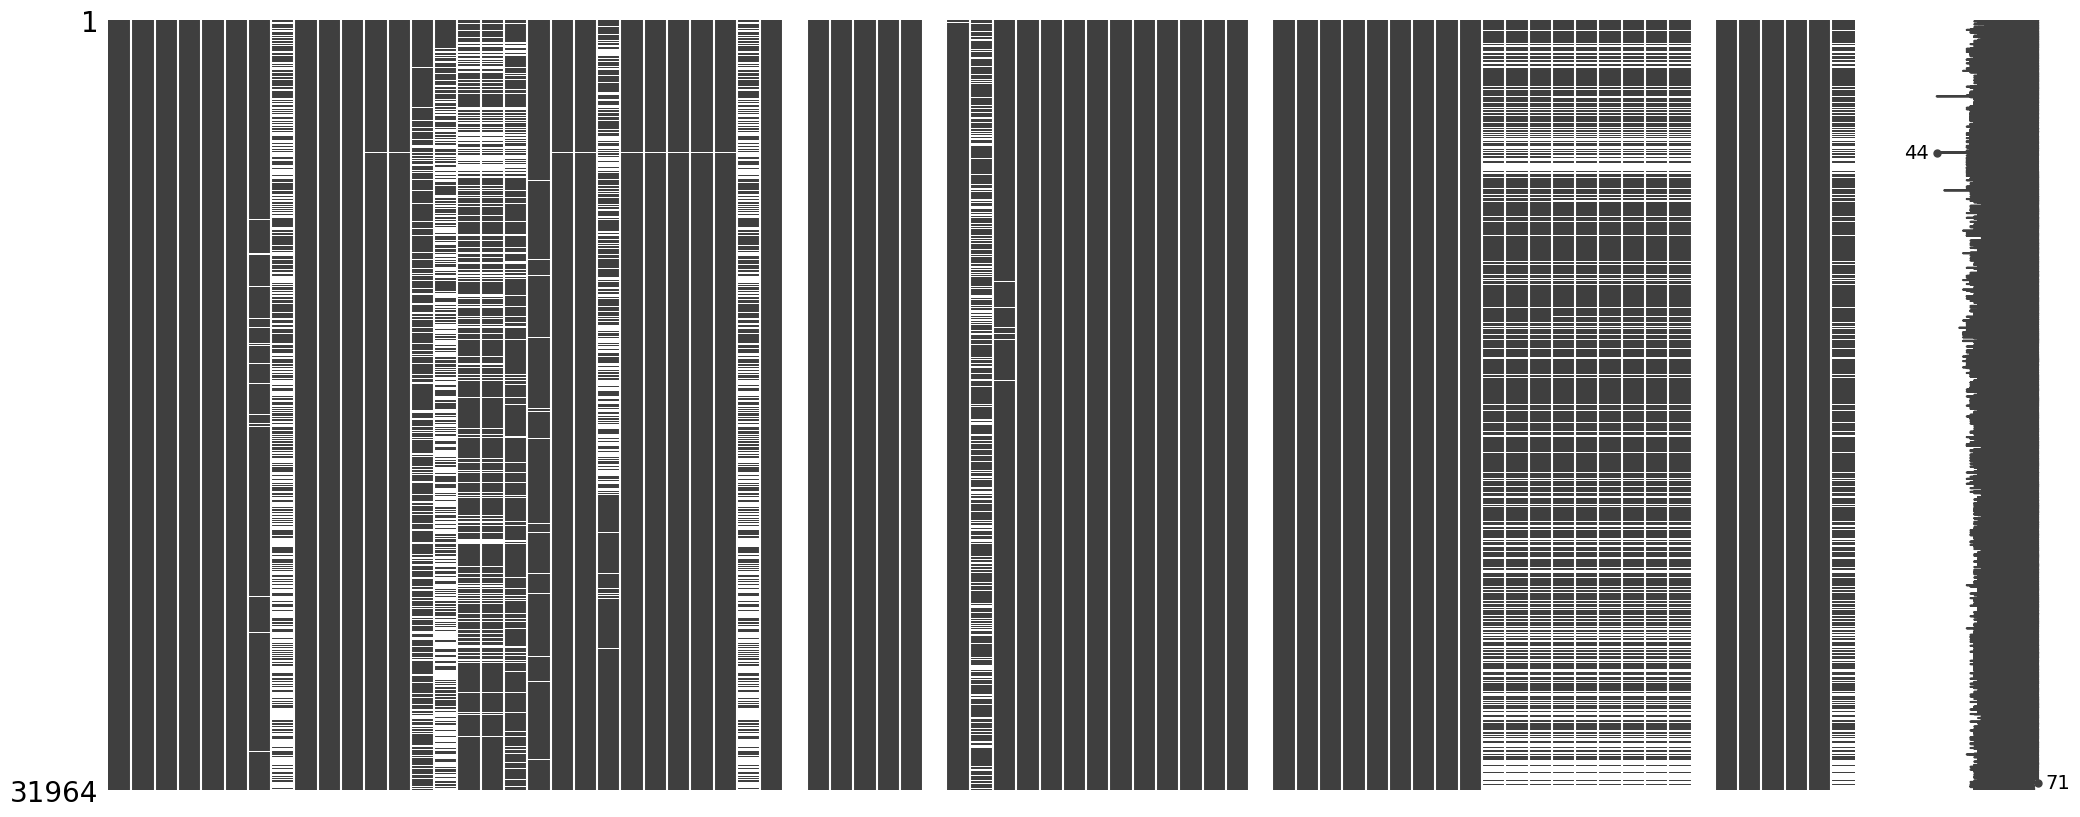

In [182]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(ds)

Notem que essa visualização confirma informações obtidas nas seções anteriores, sobre variáveis sem dados e variáveis com preenchimento parcial.

## 4 Pré-Processamento

Essa seção contemplará ações de limpeza dos dados, enriquecimento e preparação do dataset para etapas futuras.

Dados que não agregam valor para a resolução do problema proposto serão descartados e outros dados poderão ser adicionados, se contribuirem para uma melhor interpretação do dataset e para melhor tratarmos o problema. Farei uma abordagem inicial de **feature selection**.

Os detalhamentos sobre cada uma destas etapas aparecerão nas seções seguintes.


### 4.1 Definição da variável alvo

Incluí essa seção logo no início da etapa de pré-processamento para evitar o risco de descartar alguma variável que seja útil para o estabelecimento da variável alvo, ainda inexistente. A variável alvo proposta na definição do problema é um novo atributo no dataset que indique o pertencimento de cada acomodação ao grupo das 10% melhores em termos de taxa de ocupação.

Uma taxa de ocupação é calculada com uma relação que divide o uso pela disponibilidade. Se um bem está disponível por 10 minutos e é usado por 9, sua taxa de uso é de 90%. Como as reservas das acomodações acontecem com contagem de dias, é natural que pensemos em usar o dia como unidade de contagem.

Notem que calcular uma taxa de ocupação envolve olhar para o passado. Eu preciso analisar a disponibilidade no passado e a utilização no passado para fazer a conta.

O melhor dado presente no dataset que entrega informações de uso da acomodação no passado é a quantidade de reviews.

Existem 4 variáveis que posso considerar:

| Variáveis | Descrição |
|-----------|-----------|
|number_of_reviews | Número total de reviews da acomodação |
|number_of_reviews_ltm | Número total de reviews nos últimos 12 meses |
|number_of_reviews_l30d | Número total de reviews nos últimos 30 dias |
|reviews_per_month | Número de reviews por mês durante todo o período de existência da acomodação na plataforma |

Descarto number_of_reviews pois é uma variável que vai exigir uma análise usando o período de existência de cada acomodação o que pode envolver tanto períodos muito curtos como períodos muito longos, agregando muita influência de sazonalidade e outros fatores temporais não controlados no resultado. Também descarto reviews_per_month pelos mesmos motivos.

Dentre **number_of_reviews_ltm** e number_of_reviews_l30d, entendo que a primeira contempla um horizonte de tempo mais significativo e abrangente, de 12 meses, para o resultado esperado. Cobre as quatro estações do ano e períodos de alta e baixa temporada de turismo, além de ser um horizonte de tempo razoável para entender qualquer comportamento diferenciado nos dados, caso apareça.

No meu entendimento esse é o melhor dado que podemos usar para inferir a taxa de ocupação das acomodações mas não podemos nos esquecer de que escrever o review não é uma ação obrigatória para os hóspedes então a relação entre estadias e quantidades de reviews não é 1 para 1.

Será criado então um novo atributo no dataset para indicar o pertencimento ao grupo das 10% melhores onde o cálculo será feito a partir desta variável. Esse novo atributo receberá o nome de **best player**. Executarei esta ação na seção de tratamento final do dataset.

### 4.2 Feature selection (Não Supervisionada)

Farei algumas ações de *feature selection* com o objetivo não só de simplificar esse trabalho mas também de buscar eficiência computacional no tratamento dos dados. A **abordagem inicial** será uma abordagem **não supervisionada**, onde não utilizarei a variável de saída para a tomada de decisão sobre a remoção dos atributos.

Antes de iniciar as ações de *feature selection*, eu proponho uma análise qualitativa em relação ao dataset e uma organização da informação segundo uma visão de entidades relevantes.

Essa modelagem conceitual organiza os atributos segundo as entidades: **Acomodação**, **Localização da Acomodação**, **Anfitrião** e **Outros**.

<br>

Acomodação  | Localização da Acomodação | Anfitrião | Outros
-------------------|------------------|------------------|------------------
id                 |neighborhood_overview| host_id  |    scrape_id              
listing_url        | neighbourhood |  host_url    | last_scraped
name               | neighbourhood_cleansed |   host_name |       source      
description        |neighbourhood_group_cleansed| host_since |
picture_url             | latitude | host_location
property_type           | longitude |    host_about              
room_type               |     |   host_response_time                
accommodates            |     |    host_response_rate              
bathrooms               |     |   host_acceptance_rate           
bathrooms_text          |     |    host_is_superhost         
bedrooms                |     |   host_thumbnail_url       
beds                    |     |  host_picture_url      
amenities               |     |   host_neighbourhood    
price                   |     |    host_listings_count
minimum_nights          |     |    host_total_listings_count
maximum_nights          |     |  host_verifications
minimum_minimum_nights  |     |   host_has_profile_pic        
maximum_minimum_nights  |     |     host_identity_verified    
minimum_maximum_nights  |     |   calculated_host_listings_count    
maximum_maximum_nights  |     |   calculated_host_listings_count_entire_homes  
minimum_nights_avg_ntm  |     | calculated_host_listings_count_private_rooms
maximum_nights_avg_ntm  |     | calculated_host_listings_count_shared_rooms
calendar_updated        |       
has_availability        |       
availability_30         |                         
availability_60         |                        
availability_90         |                        
availability_365        |                        
calendar_last_scraped   |                       
number_of_reviews       |                        
number_of_reviews_ltm   |                        
number_of_reviews_l30d  |                        
first_review            |                         
last_review             |                         
review_scores_rating    |                        
review_scores_accuracy  |                        
review_scores_cleanliness |                      
review_scores_checkin    |                       
review_scores_communication |                    
review_scores_location      |                   
review_scores_value         |                    
license                     |                    
instant_bookable            |                     
reviews_per_month |


Incluo também um trecho de código para inicializar um dataset em separado para sofrer as operações de limpeza, mantendo o dataset original com seus dados.

In [183]:
# criação de um novo dataset para executar as operações de limpeza
# recuperando os nomes das colunas
col = list(ds.columns)

# o novo dataset irá conter todas as colunas do dataset original
ds_cleansed = ds[col[:]]

#### 4.2.1 Seleção de atributos da entidade Acomodação

Removendo colunas que não contém dados.

In [184]:
# removendo as colunas bathrooms, calendar_updated e license pois
# não contém dados
ds_cleansed.drop([BATHROOMS, CALENDAR_UPDATED, LICENSE], axis=1, inplace= True)

Removendo a coluna **id** por não contribuir para a análise e a estatística do dataset.

In [185]:
# removendo id
ds_cleansed.drop([ID], axis=1, inplace= True)

Removendo coluna **name**, que se refere a um título dado para a acomodação, por que é um dado presente em todas as instâncias e a diferenciação da qualidade do preenchimento desse título exigiria uma esforço com uso de técnicas de processamento de linguagem natural que não são escopo desse trabalho.

In [186]:
# removendo name
ds_cleansed.drop([NAME], axis=1, inplace= True)

Eu poderia usar duas abordagens para considerar a coluna **description** como influenciadora da variável alvo de taxa de ocupação.

1. Uma acomodação com description preenchida provavelmente teria uma taxa de
ocupação melhor do que uma com esse dado vazio. No entanto, quase a totalidade do dataset tem esse valor preenchido (31305 de 31964) então usar essa técnica não traria tanto benefício.
2. Outra possibilidade seria fazer uma avaliação qualitativa do texto escrito, com técnicas de processamento de linguagem natural, para transformar esse texto num dado categorizado e ordenado

Opto por remover a coluna description por questões de simplificação da análise e do trabalho.

In [187]:
# removendo description
ds_cleansed.drop([DESCRIPTION], axis=1, inplace= True)

Removo a coluna **picture_url** e faço considerações similares aquelas feitas para description. Poderíamos usar técnicas mais avançadas de visão computacional para a avaliação da imagem mas não faz parte do escopo desse trabalho.

In [188]:
# removendo picture_url
ds_cleansed.drop([PICTURE_URL], axis=1, inplace= True)

As variáveis relacionadas aos valores mínimo e máximo de dias para uma reserva de hospedagem na acomodação são: **minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm e maximum_nights_avg_ntm**. Enquanto as duas primeiras são valores padrão para a acomodação, as outras são valores configurados pelo anfitrião para datas futuras no calendário.

Por questões de simplificação, vou manter no dataset apenas os valores padrão da acomodação removendo as outras.


In [189]:
# removendo minimum_minimum_nights, maximum_minimum_nights,
# minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm,
# maximum_nights_avg_ntm
ds_cleansed.drop([MINIMUM_MINIMUM_NIGHTS, MAXIMUM_MINIMUM_NIGHTS,\
                  MINIMUM_MAXIMUM_NIGHTS, MAXIMUM_MAXIMUM_NIGHTS,\
                  MINIMUM_NIGHTS_AVG_NTM, MAXIMUM_NIGHTS_AVG_NTM], axis=1,\
                  inplace= True)

Existem variáveis no dataset que informam sobre disponibilidade de reserva para a acomodação. São elas: **has_availability, availability_30, availability_60, availability_90 e availability_365**.

Enquanto a primeira indica apenas se há ou não disponibilidade independente do horizonte de tempo, as subsequentes indicam a quantidade de dias disponíveis no horizonte de tempo mencionado no próprio nome da variável.

A princípio imagino que todas as acomodações estariam disponíveis para reserva mas uma análise simples nesse dado mostra que isso não é verdade.


In [190]:
# Verifica a distribuição para a variável has_availability
ds_cleansed.groupby('has_availability').size()

has_availability
f     1024
t    30940
dtype: int64

Podemos observar que existem acomodações que não tem disponibilidade de reserva. Isso poderia acontecer por serem casos de super sucesso onde hóspedes já pegaram todas as datas disponíveis ou simplesmente pelo fato do anfitrião não querer disponibilizar a acomodação naquele momento. Eu apostaria bem mais no segundo cenário.

Como a informação do porquê da indisponibilidade não está presente e as possíveis motivações para ela são completamente antagônicas para influência de taxa de ocupação, eu opto por remover essas instâncias do dataset.

In [191]:
# removendo instâncias
ds_cleansed = ds_cleansed.query("has_availability != 'f'")

O mesmo racional vale para as outras variáveis relacionadas à disponibilidade em períodos de tempo futuro. Pode não haver disponibilidade simplesmente por que hóspedes já fizeram reserva para vários dias do calendário da acomodação ou por que o anfitrião opta por abrir disponibilidade em períodos específicos. O primeiro seria ótimo para inferir uma taxa de ocupação alta mas o segundo cenário seria péssimo, com a inferência acontecendo de maneira errada.

Portanto, vou remover essas variáveis do dataset, para não haver contaminação.

In [192]:
# removendo has_availability, availability_30, availability_60,
# availability_90, availability_365
ds_cleansed.drop([HAS_AVAILABILITY, AVAILABILITY_30, AVAILABILITY_60,\
                  AVAILABILITY_90, AVAILABILITY_365], axis=1, inplace= True)

A variável **calendar_last_scraped** serve apenas para indicar o momento em que o calendário foi analisado para que fossem encontrados os valores de disponibilidade da acomodação em datas futuras. Não agrega na análise estatística e portanto será removida.

In [193]:
# removendo calendar_last_scraped
ds_cleansed.drop([CALENDAR_LAST_SCRAPED], axis=1, inplace= True)

As variáveis relacionadas a quantidade absoluta de reviews, datas de primeiro e último review e frequência são: **number_of_reviews, number_of_reviews_ltm number_of_reviews_l30d, first_review, last_review e reviews_per_month**.

Entendo que a quantidade absoluta de reviews (**number_of_reviews**) pode influenciar na decisão de um hóspede em fazer uma reserva e por isso vou **manter** essa variável.

A quantidade de reviews no último ano (**number_of_reviews_ltm**) será usada para cálculo da variável alvo e por isso será **mantida**. Importante notar que todas as instâncias tem valor preenchido para essa variável e por isso não foi necessária uma ação de limpeza de instâncias.

A quantidade de reviews nos últimos 30 dias (**number_of_reviews_l30d**) pode ser um indicativo indireto de mais probabilidade de alta taxa de ocupação e por isso vou **manter** essa variável.

Vou assumir que data do primeiro review (**first_review**) é pouco relevante para taxa de ocupação e vou **remover** essa variável, ao contrário da data do último review (**last_review**), que pode ser considerado como um dado importante para decisão do hóspede em fazer a reserva, e portanto **manterei** esta última.

Já a variável de reviews por mês (**reviews_per_month**) pode ser útil para o cálculo de data de registro da acomodação na plataforma Airbnb, já que esse dado não está presente no dataset. Portanto manterei por enquanto essa variável no dataset.

In [194]:
# removendo first_review
ds_cleansed.drop([FIRST_REVIEW], axis=1, inplace= True)

Existe outro grupo de variáveis relacionado ao tema de review mas desta vez elas representam de fato um valor númerico de pontuação da acomodação. São números que indicam qualitativamente como os hóspedes avaliaram a acomodação. São elas: **review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location e review_scores_value**.

É bem razoável considerarmos que a avaliação em pontos de uma acomodação influencia diretamente na sua taxa de ocupação.

No entanto, enquanto a variável review_scores_rating traz um valor numérico já sumarizado de todos os quesitos de avaliação, as outras variáveis trazem pontuações para critérios específicos.

Nesse trabalho, vou optar por usar apenas essa variável sumarizada eliminando as outras. Ficará como trabalho futuro uma análise mais aprofundada dentro das pontuações específicas se essa variável sumarizada se mostrar bastante significativa para a taxa de ocupação.


In [195]:
# removendo review_scores_accuracy, review_scores_cleanliness,
# review_scores_checkin, review_scores_communication, review_scores_location
# e review_scores_value.
ds_cleansed.drop([REVIEW_SCORES_ACCURACY, REVIEW_SCORES_CLEANLINESS,\
                  REVIEW_SCORES_CHECKIN, REVIEW_SCORES_COMMUNICATION,\
                  REVIEW_SCORES_LOCATION, REVIEW_SCORES_VALUE],\
                  axis=1, inplace= True)

A última variável para a entidade Acomodação é a **instant_bookable**. Ela indica se a acomodação aceita reserva imediata sem necessidade de revisão do anfitrião.

Entendo que é um fator que pode influenciar na taxa de ocupação e por isso **manterei** essa variável no dataset.



#### 4.2.2 Seleção de atributos da entidade Localização da Acomodação

Removendo colunas que não contém dados.

In [196]:
# removendo a coluna neighbourhood_group_cleansed
ds_cleansed.drop([NEIGHBOURHOOD_GROUP_CLEANSED], axis=1, inplace= True)

A variável **neighborhood_overview** inclui um texto escrito pelo próprio anfitrião onde ele tem a opção de descrever o bairro onde se localiza a acomodação.

Ao analisar o dataset, podemos ver que 16739 instâncias tem essa variável preenchida, ou seja, aproximadamente metade do dataset.

Eu vou **manter** essa variável **transformando-a num booleano** que indica se o texto foi preenchido ou não. Estou assumindo que o esforço de preenchimento desse texto pode influenciar na taxa de ocupação da acomodação e portanto quero considerar isso na análise do trabalho. Poderia fazer também a análise do texto envolvendo processamento de linguagem natural mas isso traria muita complexidade para esse trabalho, então descarto essa abordagem.


A variável **neighbourhood** está parcialmente preenchida no dataset e além disso, quando preenchida, carrega o nome da cidade do Rio de Janeiro. Como nossa análise já considera que todas as instâncias são do Rio de Janeiro, essa variável acaba ficando incompleta e irrelevante para a análise e por isso pode ser removida. A decisão de remoção também está baseada no fato de que existe outra variável que informa sobre bairro.

In [197]:
# removendo a coluna neighbourhood
ds_cleansed.drop([NEIGHBOURHOOD], axis=1, inplace= True)

A variável **neighbourhood_cleansed** tem todas as suas instâncias com valores preenchidos e traz a informação de bairro a partir de um cálculo feito com os dados de latitude e longitude. Essa variável é muito importante para a análise proposta e será mantida.

As variáveis ***latitude*** e ***longitude*** trazem no detalhe a localização da acomodação e foram importantes para a definição clara do bairro (o dataset veio já com esse cálculo feito). No entanto, não fará parte do escopo desse trabalho fazer uma análise usando uma granularidade de localização mais precisa do que bairro. Além disso, não pretendo usar essas variáveis para nenhuma visualização com recurso de mapas. Portanto, para redução e simplificação do dataset, também opto pela remoção dessas variáveis.


In [198]:
# removendo as colunas latitude e longitude
ds_cleansed.drop([LATITUDE, LONGITUDE], axis=1, inplace= True)

#### 4.2.3 Seleção de atributos da entidade Anfitrião

**Removendo** **host_id** e **host_url** por que não contribuem estatisticamente para atuar com o problema proposto.

In [199]:
# removendo as colunas host_id e host_url
ds_cleansed.drop([HOST_ID, HOST_URL], axis=1, inplace= True)

A coluna **host_name** contém o nome de uma pessoa e por questões de privacidade de dados, estou **removendo** essa variável.

Esse dado até poderia ser considerado como influenciador do processo de decisão do hóspede uma vez que nomes mais familiares para a nacionalidade da pessoa podem soar mais próximos e amigáveis, ou mesmo trazer um entendimento de que falam o mesmo idioma. No entanto, opto por descartar para atender requisito de privacidade.




In [200]:
# removendo a coluna host_name
ds_cleansed.drop([HOST_NAME], axis=1, inplace= True)

Vou **manter** a variável **host_since** pelo entendimento de que anfitriões mais antigos podem ter mais habilidade nas decisões de gestão da acomodação fazendo com que a taxa de ocupação melhore.

Verificando o preenchimento de **host_location** e **host_neighbourhood**.

In [201]:
ds_cleansed['host_location'].value_counts().head(15)

host_location
Rio de Janeiro, Brazil             18994
State of Rio de Janeiro, Brazil     1747
Rio, Brazil                          872
Brazil                               585
São Paulo, Brazil                    562
Brasília, Brazil                     100
Belo Horizonte, Brazil                99
Niterói, Brazil                       82
Porto Alegre, Brazil                  52
New York, NY                          51
London, United Kingdom                46
Paris, France                         45
Petrópolis, Brazil                    40
Armação dos Búzios, Brazil            38
State of São Paulo, Brazil            37
Name: count, dtype: int64

In [202]:
ds_cleansed['host_neighbourhood'].value_counts().head(30)

host_neighbourhood
Copacabana                  7369
Barra da Tijuca             2568
Ipanema                     2448
Leblon                      1106
Recreio dos Bandeirantes    1083
Botafogo                     974
Santa Teresa                 671
Jacarepaguá                  597
Centro                       574
Flamengo                     492
Leme                         425
Tijuca                       310
Laranjeiras                  294
Vidigal                      270
Lapa                         264
São Conrado                  258
Glória                       212
Moema                        131
Gávea                        131
Catete                       129
Lagoa                        128
Camorim                      121
Jardim Botânico              114
Humaitá                      112
Itanhangá                    107
Vila Isabel                   90
Barra de Guaratiba            89
Urca                          88
Joá                           85
Curicica                

Vou **manter, por enquanto**, **host_location** e **host_neighbourhood** por entender que uma proximidade do anfitrião com a localização da acomodação pode trazer facilidades logísticas de administração e isso influenciaria positivamente na taxa de ocupação.



A variável **host_about** é um descrição preenchida pelo próprio anfitrião sobre ele ou ela mesmos. Cerca de metade das instâncias tem valores preenchidos para esta variável. Entendo que isso funciona como uma apresentação e melhora as relações humanas entre hóspede e anfitrião, influenciando na decisão do hóspede.

Mais uma vez, eu poderia usar uma técnica de processamento de linguagem natural para avaliar o preenchimento desse campo mas vou fazer apenas uma diferenciação entre estar preenchido ou não. Portanto, **mantenho** essa variável no dataset.

A variável **host_response_time**	é uma variável categórica ordenada e as variáveis **host_response_rate**	e **host_acceptance_rate** são variáveis numéricas. Considero todas elas relevantes para influenciar na taxa de ocupação da acomodação e por isso vou **mantê-las**.

Segundo o próprio Airbnb, Superhosts [são anfitriões de mais alto desempenho](https://www.airbnb.com.br/help/article/829). A variável **host_is_superhost** é um booleano que traz essa informação e provavelmente tem influência na taxa de ocupação. Vou **manter** essa variável no dataset.

As variáveis **host_thumbnail_url**	e **host_picture_url** estão preenchidas para praticamente todas as instâncias do dataset. A variável **host_has_profile_pic** deriva de host_picture_url. Por questões de simplificação e também por entender que uma foto do anfitrião envolve questões de privacidade de dados, opto por **remover** essas variáveis.

In [203]:
# removendo as colunas host_thumbnail_url, host_picture_url e
# host_has_profile_pic
ds_cleansed.drop([HOST_THUMBNAIL_URL, HOST_PICTURE_URL, HOST_HAS_PROFILE_PIC],\
                 axis=1, inplace= True)

As variáveis **host_listings_count**, **host_total_listings_count**, **calculated_host_listings_count**, **calculated_host_listings_count_entire_homes**, **calculated_host_listings_count_private_rooms** e **calculated_host_listings_count_shared_rooms** trazem dados sobre a quantidade e o tipo de acomodações sob responsabilidade de um anfitrião. As duas primeiras são informações provenientes do próprio Airbnb enquanto as restantes são calculadas no processo de scrapping de dados do site Inside Airbnb.

Eu vou considerar que essa métrica é relevante para influenciar em taxa de ocupação supondo que a habilidade do anfitrião melhora com acomodações a mais para serem administradas mas passa a piorar a partir de algum ponto de inflexão, se não existir uma equipe para trabalhar em conjunto na administração.

Por questões de simplificação, opto por selecionar e **manter** apenas a variável **host_total_listings_count**, proveniente do Airbnb, como a representante desse conjunto de dados.

Então eu removo as variáveis restante desse conjunto.






In [204]:
# removendo as colunas host_listings_count, calculated_host_listings_count,
# calculated_host_listings_count_entire_homes,
# calculated_host_listings_count_private_rooms e
# calculated_host_listings_count_shared_rooms
ds_cleansed.drop([HOST_LISTINGS_COUNT, CALCULATED_HOST_LISTINGS_COUNT,\
                  CALCULATED_HOST_LISTINGS_COUNT_ENTIRE_HOMES,\
                  CALCULATED_HOST_LISTINGS_COUNT_PRIVATE_ROOMS,\
                  CALCULATED_HOST_LISTINGS_COUNT_SHARED_ROOMS],\
                  axis=1, inplace= True)

Analisando host_verifications:

In [205]:
ds_cleansed[HOST_VERIFICATIONS].value_counts()

host_verifications
['email', 'phone']                    24637
['phone']                              3783
['email', 'phone', 'work_email']       2367
['phone', 'work_email']                 110
['email']                                30
[]                                       11
['email', 'work_email']                   1
['email', 'phone', 'photographer']        1
Name: count, dtype: int64

Por questões de simplificação, vou assumir que essa variável não é relevante para influenciar na taxa de ocupação e portanto, opto por removê-la.

In [206]:
# removendo a coluna host_verifications
ds_cleansed.drop([HOST_VERIFICATIONS], axis=1, inplace= True)

Analisando 	host_identity_verified

In [207]:
ds_cleansed[HOST_IDENTITY_VERIFIED].value_counts()

host_identity_verified
t    25023
f     5917
Name: count, dtype: int64

A [verificação de identidade](https://www.airbnb.com/help/article/1237#section-heading-9-0) é um processo importante para a plataforma Airbnb e as pessoas que passaram por esse processo ganham um badge, o que aumenta o seu nível de credibilidade. Portanto, vou considerar a variável **host_identity_verified** como relevante para taxa de ocupação e portanto, opto por **mantê-la**.

#### 4.2.4 Seleção de atributos da entidade Outros

A entidade Outros é apenas um agrupamento de variáveis que considerei não significativas para influenciar na taxa de ocupação e que tem mais relação com o processo de captura de dados.

Com isso, opto por removê-las do dataset.

In [208]:
# removendo as colunas scrape_id, last_scraped e source
ds_cleansed.drop([SCRAPE_ID, LAST_SCRAPED, SOURCE], axis=1, inplace= True)

#### 4.2.5 Análise após ações de redução de atributos

Verificando agora como ficaram as dimensões do dataset após as ações de limpeza.

In [209]:
# Análise de dimensões do dataset
print('Quantidade de linhas e quantidade de colunas:' , ds_cleansed.shape)

Quantidade de linhas e quantidade de colunas: (30940, 30)


Notem que a quantidade de instâncias diminiui devido à ação de limpeza feita com as acomodações com reservas indisponíveis.

A quantidade de variáveis também diminuiu significativamente, saindo de um total de 75 para 30.

A variável listing_url ainda foi mantida para ser utilizada caso alguma acomodação tenha que ser identificada unicamente. Outras variáveis também foram mantidas para possível uso em conversão de dados.



Numa visão tabular e de acordo com a análise baseada em entidades, o dataset ficou assim:

<br>

Acomodação         | Localização da Acomodação | Anfitrião
-------------------|------------------------|------------------
listing_url*       | neighborhood_overview  | host_since                
property_type      | neighbourhood_cleansed | host_location
room_type          |                        | host_about           
accommodates       |                        | host_response_time
bathrooms_text     |                        | host_response_rate
bedrooms           |                        | host_acceptance_rate                 
beds               |                        | host_is_superhost  
amenities          |                        | host_neighbourhood
price              |                        | host_total_listings_count
minimum_nights     |                        | host_identity_verified
maximum_nights     |                        |          
number_of_reviews  |                        |        
number_of_reviews_ltm |                     |       
number_of_reviews_l30d |                    |     
last_review        |                        |    
review_scores_rating |                      |  
instant_bookable   |                        |           
reviews_per_month  |                        |         
  

E agora mais uma vez a visão matricial do dataset.

<Axes: >

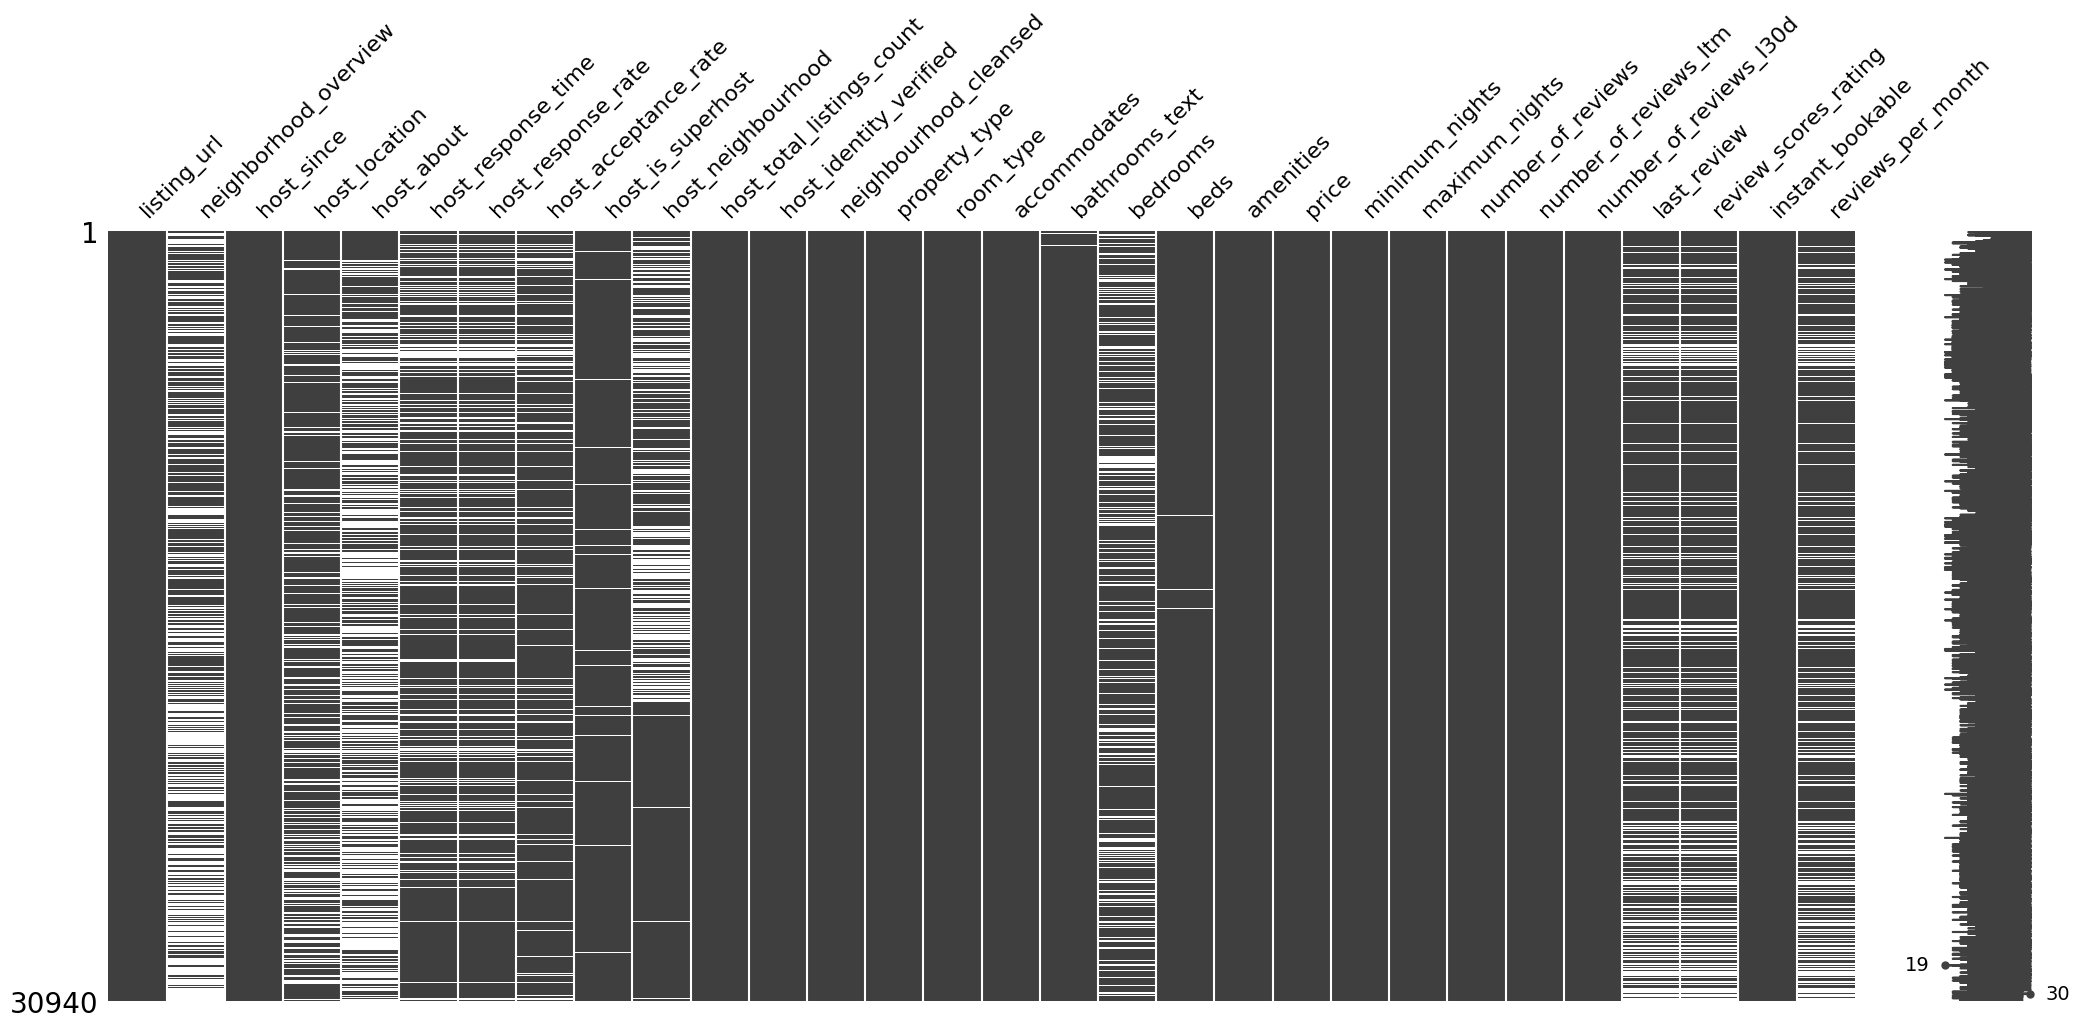

In [210]:
ms.matrix(ds_cleansed)

Notem que já não existem as colunas sem dados e que a quantidade de colunas é bem menor, permitindo a geração do gráfico com a presença do nome de cada variável. Fica mais claro de visualizar também as variáveis parcialmente preenchidas.

### 4.3 Tratamento de missings, limpeza e transformação de dados (+Feature Selection)

Essa seção visa agrupar todas as ações a serem executadas no dataset para garantir a completude e a qualidade do mesmo. Alguns dos problemas que devem ser tratados nesta etapa do pré-processamento podem ser: alinhamento de unidades de medida, preenchimento de valores faltantes, acerto de valores inconsistentes ou adaptação de intervalores de valores. Usarei técnicas de *feature engineering* como extração de características e construção de recursos para capturar informações importantes. É possível que ainda sejam executadas ações de seleção de atributos de maneira não supervisionada após algumas análises.


Criarei um novo dataset para essa etapa, mantendo os datasets anteriores inalterados a partir daqui.

In [211]:
# criação de um novo dataset para executar as operações de tratamento
# recuperando os nomes das colunas
col_cleansed = list(ds_cleansed.columns)

# o novo dataset irá conter todas as colunas do dataset original
ds_treated = ds_cleansed[col_cleansed[:]]

#### 4.3.1 Análise inicial e planejamento

Repito aqui uma análise básica de metadados para percepções introdutórias.

In [212]:
# Exibir os tipos de dados de todas as variáveis
print(ds_treated.dtypes)

listing_url                   object
neighborhood_overview         object
host_since                    object
host_location                 object
host_about                    object
host_response_time            object
host_response_rate            object
host_acceptance_rate          object
host_is_superhost             object
host_neighbourhood            object
host_total_listings_count    float64
host_identity_verified        object
neighbourhood_cleansed        object
property_type                 object
room_type                     object
accommodates                   int64
bathrooms_text                object
bedrooms                     float64
beds                         float64
amenities                     object
price                         object
minimum_nights                 int64
maximum_nights                 int64
number_of_reviews              int64
number_of_reviews_ltm          int64
number_of_reviews_l30d         int64
last_review                   object
r

Já podemos perceber grande oportunidade de ajuste de tipagem de dados.

In [213]:
# Analisando a completude de dados de cada variável
ds_treated.count()

listing_url                  30940
neighborhood_overview        16385
host_since                   30940
host_location                25098
host_about                   15553
host_response_time           25121
host_response_rate           25121
host_acceptance_rate         26902
host_is_superhost            30287
host_neighbourhood           23382
host_total_listings_count    30940
host_identity_verified       30940
neighbourhood_cleansed       30940
property_type                30940
room_type                    30940
accommodates                 30940
bathrooms_text               30919
bedrooms                     23894
beds                         30777
amenities                    30940
price                        30940
minimum_nights               30940
maximum_nights               30940
number_of_reviews            30940
number_of_reviews_ltm        30940
number_of_reviews_l30d       30940
last_review                  23630
review_scores_rating         23630
instant_bookable    

Também podemos perceber a necessidade de ações para complementação do dataset eliminando a existência de valores nulos.

Repito aqui a visão tabular de entidades pois farei as ações de ajuste no dataset nesta seção organizando essas ações por entidade.

<br>

Acomodação         | Localização da Acomodação | Anfitrião
-------------------|------------------------|------------------
listing_url*       | neighborhood_overview  | host_since                
property_type      | neighbourhood_cleansed | host_location
room_type          |                        | host_about           
accommodates       |                        | host_response_time
bathrooms_text     |                        | host_response_rate
bedrooms           |                        | host_acceptance_rate                 
beds               |                        | host_is_superhost  
amenities          |                        | host_neighbourhood
price              |                        | host_total_listings_count
minimum_nights     |                        | host_identity_verified
maximum_nights     |                        |          
number_of_reviews  |                        |        
number_of_reviews_ltm |                     |       
number_of_reviews_l30d |                    |     
last_review        |                        |    
review_scores_rating |                      |  
instant_bookable   |                        |           
reviews_per_month  |                        |         

#### 4.3.2 Tratamentos na entidade Acomodação

##### Property Type e Room Type

Analisando valores da variável property_type.

In [214]:
# verificando valores para variável property_type
ds_treated[PROPERTY_TYPE].value_counts()

property_type
Entire rental unit                    18671
Private room in rental unit            3653
Entire condo                           1853
Entire home                            1448
Private room in home                   1072
Entire serviced apartment               810
Entire loft                             763
Private room in condo                   407
Private room in bed and breakfast       269
Room in hotel                           218
Shared room in rental unit              186
Shared room in home                     153
Private room in guest suite             116
Entire guesthouse                       104
Room in aparthotel                       99
Entire villa                             98
Private room in serviced apartment       87
Private room in guesthouse               74
Shared room in bed and breakfast         61
Entire guest suite                       60
Shared room in hostel                    60
Entire vacation home                     49
Private room in ca

Analisando valores da variável room_type.

In [215]:
# verificando valores para variável room_type
ds_treated[ROOM_TYPE].value_counts()

room_type
Entire home/apt    24155
Private room        6203
Shared room          539
Hotel room            43
Name: count, dtype: int64

Ao observar que a variável property_type traz informações mais detalhadas sobre as acomodações e a variável room_type traz informações mais alinhadas com uma visão de categorias e mais simples, opto por remover a coluna property_type, usando apenas room_type. **Portanto, executo mais uma operação de seleção de atributos de modo não supervisionado.** As descrições presentes em property_type, quando específicas, atendem as necessidades de hóspedes que buscam experiências especiais. Esses dados entram num nível de granularidade não necessário para o escopo desse trabalho. As categorias presentes em room_type são mais bem alinhadas com o que se busca nesse notebook.

In [216]:
# removendo a coluna property_type
ds_treated.drop([PROPERTY_TYPE], axis=1, inplace= True)

##### Accomodates

Essa coluna está totalmente preenchida e o tipo de dado está definido corretamente, como um dado numérico. Por enquanto não farei nenhuma ação de ajuste nessa variável.

##### Bathrooms

Segundo o dicionário de dados do site Inside Airbnb, o Airbnb mudou o campo de banheiros para o formato texto. A coluna bathrooms_text traz essa informação.

In [217]:
# verificando valores para variável bathrooms_text
ds_treated['bathrooms_text'].value_counts()

bathrooms_text
1 bath               13806
2 baths               6089
1 shared bath         2254
1 private bath        1883
1.5 baths             1629
3 baths               1545
2.5 baths             1051
2 shared baths         471
1.5 shared baths       401
3.5 baths              398
4 baths                365
4.5 baths              154
5 baths                142
5.5 baths               89
6 baths                 87
2.5 shared baths        77
3 shared baths          71
7 baths                 52
6.5 baths               43
4 shared baths          38
0 baths                 34
Half-bath               34
8 baths                 33
0 shared baths          24
7.5 baths               23
3.5 shared baths        20
Shared half-bath        17
5 shared baths          13
4.5 shared baths        12
11 baths                 8
9 baths                  7
10 baths                 6
7 shared baths           6
8.5 baths                5
6 shared baths           5
8 shared baths           4
11.5 baths   

Notem que existem instâncias do dataset que informam números não inteiros para indicar quantidade de banheiros e também há a indicação sobre banheiros compartilhados. Após uma breve pesquisa na internet ([link](https://airbnbtales.com/shared-bathroom/#:~:text=The%20%E2%80%9C.,be%20handy%20for%20quick%20visits.)), encontrei respostas indicando que esse é um conceito do mercado de imóveis de algumas regiões, como nos EUA. Uma indicação de 1.5, por exemplo, indicaria que existe um banheiro completo com chuveiro/banheira, vaso sanitário e pia e mais outro apenas com vaso sanitário e pia. Também encontrei links que sinalizam dificuldades dos anfitriões em informar corretamente esse dado, justamente por não conhecer o conceito ([link](https://community.withairbnb.com/t5/Help/Shared-bathroom-classification-1-5-or-ZERO/m-p/280614)).



Notem também que não seria correto eu fazer uma transformação direta dessa variável para numérico pois perderia bastante significado semântico do valor do campo. Uma acomodação do tipo quarto, que tem um banheiro exclusivo (suíte) tem atratividade bastante diferente de um quarto que oferece ao hóspede apenas um banheiro compartilhado.

Farei uma transformação nessa variável para buscar representar a disponibilidade de banheiros por hóspede e também considerarei o fato de ser compartilhado ou não, usando uma simplificação. Quero chegar num valor numérico que seja mais representativo para a atratividade de uma acomodação considerando a oferta de banheiros.

Quando não houver a palavra shared, vou assumir que a quantidade de banheiros declarada vai ser dividida pela quantidade de hóspedes aceitos. Sei que nem sempre as reservas são feitas usando o total de hóspedes aceitos mas vou assumir que essa relação é quase sempre adequada e estável.

Quando houver a palavra shared, vou fazer uma conta similar à anterior, com a diferença de que vou adicionar 1 ao valor total de hóspedes aceitos, para afetar negativamente o resultado numérico da equação nesse caso.

Alguns exemplos:

Banheiros | Hóspedes | Resultado
----------| -------- | ---------
1 bath | 1 | 1
1 bath | 2 | 0.5
1 bath | 3 | 0.33
2 baths | 2 | 1
2 baths | 4 | 0.5
1 shared bath | 1 | 0.5
1 shared bath | 2 | 0.33

As regras de negócios definidas acima foram inseridas na função get_bathrooms_index já declarada.

Vou criar uma nova coluna chamada baths_index que será usada para armazenar os valores numéricos segundo as regras definidas nessa seção e também vou criar uma nova coluna chamada baths_category que simplificará a leitura de categoria de banheiro, além de permitir verificar se aparecerá alguma diferença na métrica da taxa de ocupação de acordo com essas categorias.

Criando a nova coluna com o índice de banheiros.

In [218]:
# criando uma nova coluna no dataset para registrar variável que represente
# o índice de banheiros
ds_treated[BATHS_INDEX] = ds_treated.apply(get_bathrooms_index, axis=1)

Criando uma nova coluna com as categorias de banheiro.

In [219]:
# criando uma nova coluna no dataset para registrar variável que represente
# a categoria de banheiro
ds_treated[BATHS_CATEGORY] = ds_treated.apply(get_bathrooms_category, axis=1)

Agora faço uma análise estatística nas colunas recém criadas.

In [220]:
ds_treated[BATHS_INDEX].describe()

count    30940.000000
mean         0.427410
std          0.243827
min          0.000000
25%          0.250000
50%          0.375000
75%          0.500000
max          8.000000
Name: baths_index, dtype: float64

In [221]:
ds_treated[BATHS_CATEGORY].value_counts()

baths_category
dedicated      27500
shared          3419
no_bathroom       21
Name: count, dtype: int64

Agora vou remover a coluna bathrooms_text.

In [222]:
# removendo a coluna bathrooms_text
ds_treated.drop([BATHROOMS_TEXT], axis=1, inplace= True)

##### Bedrooms

Analisando valores da coluna Bedrooms.

In [223]:
# verificando valores para variável bedrooms
ds_treated[BEDROOMS].value_counts()

bedrooms
1.0     11966
2.0      7470
3.0      3270
4.0       750
5.0       253
6.0       111
7.0        35
8.0         9
9.0         7
10.0        7
11.0        3
25.0        3
16.0        3
12.0        2
13.0        2
26.0        1
15.0        1
22.0        1
Name: count, dtype: int64

In [224]:
# verificando nulos da variável bedrooms
ds_treated[BEDROOMS].info()

<class 'pandas.core.series.Series'>
Index: 30940 entries, 0 to 31963
Series name: bedrooms
Non-Null Count  Dtype  
--------------  -----  
23894 non-null  float64
dtypes: float64(1)
memory usage: 483.4 KB


Minha hipótese é que acomodações do tipo quarto não precisam informar quantidade de quartos e por isso várias instâncias não tem esse valor preenchido.

In [225]:
# revisitando a quantidade de cada tipo de acomodação
ds_treated[ROOM_TYPE].value_counts()

room_type
Entire home/apt    24155
Private room        6203
Shared room          539
Hotel room            43
Name: count, dtype: int64

In [226]:
# verificando a quantidade de quartos por tipo de acomodação quando existem
# valores preenchidos
contagem_nao_nulos = ds_treated.groupby(ROOM_TYPE)[BEDROOMS].count()

# verificando a quantidade de quartos por tipo de acomodação quando não
# existem valores preenchidos
contagem_nulos = ds_treated.groupby(ROOM_TYPE)[BEDROOMS]\
                                              .apply(lambda x: x.isnull().sum())

# Exibir os resultados
print("Contagem de bedrooms não nulos por categoria:")
print(contagem_nao_nulos)

print("\nContagem de bedrooms nulos por categoria:")
print(contagem_nulos)

Contagem de bedrooms não nulos por categoria:
room_type
Entire home/apt    22988
Hotel room            41
Private room         865
Shared room            0
Name: bedrooms, dtype: int64

Contagem de bedrooms nulos por categoria:
room_type
Entire home/apt    1167
Hotel room            2
Private room       5338
Shared room         539
Name: bedrooms, dtype: int64


Notem que a minha hipótese é parcialmente verdadeira visto que existem valores nulos da coluna bedrooms para todas as categorias.

Após analisar esses números, entendo que vale a pena preencher os valores não nulos com uma regra específica. Vou preencher com valor 1 para todas as categorias de room_type, exceto para a categoria Shared room. Quando a acomodação for dessa categoria, vou preencher com valores que representem frações, para o número também carregar a informação de que o quarto está sendo dividido. A fração vai ser calculada usando a quantidade de hóspedes.






A função que aplica as regras descritas acima já foi declarada.

Criando uma nova coluna com os valores ajustados para quartos.

In [227]:
# criando uma nova coluna no dataset para registrar variável que represente o
# índice de banheiros
ds_treated[BEDROOMS_ADPT] = ds_treated.apply(get_bedrooms_adjusted_value,\
                                             axis=1)

Analisando valor originais para quartos.

In [228]:
ds_treated[BEDROOMS].value_counts()

bedrooms
1.0     11966
2.0      7470
3.0      3270
4.0       750
5.0       253
6.0       111
7.0        35
8.0         9
9.0         7
10.0        7
11.0        3
25.0        3
16.0        3
12.0        2
13.0        2
26.0        1
15.0        1
22.0        1
Name: count, dtype: int64

Analisando novos valores.

In [229]:
ds_treated[BEDROOMS_ADPT].value_counts()

bedrooms_adpt
1.000000     18685
2.000000      7470
3.000000      3270
4.000000       750
5.000000       253
6.000000       111
0.500000        92
0.250000        55
0.166667        37
0.333333        36
7.000000        35
0.062500        32
0.200000        25
0.125000        18
0.100000        10
8.000000         9
9.000000         7
10.000000        7
0.142857         7
0.083333         5
0.076923         4
0.111111         4
11.000000        3
25.000000        3
16.000000        3
0.071429         2
12.000000        2
13.000000        2
15.000000        1
26.000000        1
22.000000        1
Name: count, dtype: int64

Notem o incremento significativo na quantidade relativa a 1 quarto e o aparecimento de valores fracionados, dada a regra adotada.

Após comparar as colunas, vou remover a original.

In [230]:
# removendo a coluna bedrooms
ds_treated.drop([BEDROOMS], axis=1, inplace= True)

##### Beds

Analisando coluna beds.

In [231]:
# verificando valores para variável beds
ds_treated[BEDS].value_counts()

beds
1.0     10457
2.0      9147
3.0      5263
4.0      2871
5.0      1340
6.0       777
7.0       269
8.0       252
9.0        93
10.0       88
12.0       44
11.0       39
14.0       24
16.0       24
15.0       17
13.0       16
17.0        8
50.0        5
18.0        5
35.0        4
30.0        4
23.0        3
20.0        3
26.0        2
24.0        2
25.0        2
28.0        2
22.0        2
38.0        1
27.0        1
91.0        1
43.0        1
44.0        1
56.0        1
46.0        1
29.0        1
31.0        1
78.0        1
21.0        1
39.0        1
40.0        1
41.0        1
Name: count, dtype: int64

In [232]:
# verificando nulos da variável beds
ds_treated[BEDS].info()

<class 'pandas.core.series.Series'>
Index: 30940 entries, 0 to 31963
Series name: beds
Non-Null Count  Dtype  
--------------  -----  
30777 non-null  float64
dtypes: float64(1)
memory usage: 483.4 KB


Existem algumas instâncias com valor nulo para quantidade de camas. Vou analisar a média de camas por room_type.

In [233]:
# categorias que usarei para analisar a média de camas
# categorias = ['Entire home/apt','Private room','Shared room','Hotel room']
categorias_acomodacoes = ds_treated[ROOM_TYPE].unique()

# vou iterar pelas categorias e verificar a média de camas para cada uma
for cat in categorias_acomodacoes:
    print(f'Categoria: {cat}')
    df_filtrado = ds_treated[ds_treated[ROOM_TYPE].isin([cat])]
    estatisticas = df_filtrado[BEDS].describe()
    print(estatisticas)

Categoria: Entire home/apt
count    24056.000000
mean         2.689932
std          2.128234
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         91.000000
Name: beds, dtype: float64
Categoria: Private room
count    6145.000000
mean        1.558340
std         1.431676
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        50.000000
Name: beds, dtype: float64
Categoria: Shared room
count    533.000000
mean       4.626642
std        5.905061
min        1.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       50.000000
Name: beds, dtype: float64
Categoria: Hotel room
count    43.000000
mean      3.023256
std       6.243047
min       1.000000
25%       1.000000
50%       1.000000
75%       3.000000
max      41.000000
Name: beds, dtype: float64


Como são valores diferentes de média de acordo com o tipo de acomodação, vou usar essas médias específicas na hora de preencher os nulos.

Implementando a lógica de programação de acordo com as regras propostas.

In [234]:
# dicionario que vai armazenar as médias de quantidade de camas por tipo de
# acomodação
media_camas_dict = {}

# vou iterar pelos tipos e verificar a média de camas para cada uma
for tipo in categorias_acomodacoes:
    df_filtrado = ds_treated[ds_treated[ROOM_TYPE].isin([tipo])]
    estatisticas = df_filtrado[BEDS].describe()
    media_camas_dict.update({tipo : round(estatisticas.loc['mean'])})

print(f'O dicionário de médias de camas por tipo de acomodação ficou '\
       'assim: {media_camas_dict}')

O dicionário de médias de camas por tipo de acomodação ficou assim: {media_camas_dict}


In [235]:
# criando uma nova coluna no dataset para registrar variável que represente
# o valor ajustado de camas
ds_treated[BEDS_ADPT] = ds_treated.apply(get_beds_adjusted_value_by_roomtype,\
                                         axis=1, medias=media_camas_dict)

Comparando a coluna original com a nova coluna criada.

In [236]:
ds_treated[BEDS].value_counts()

beds
1.0     10457
2.0      9147
3.0      5263
4.0      2871
5.0      1340
6.0       777
7.0       269
8.0       252
9.0        93
10.0       88
12.0       44
11.0       39
14.0       24
16.0       24
15.0       17
13.0       16
17.0        8
50.0        5
18.0        5
35.0        4
30.0        4
23.0        3
20.0        3
26.0        2
24.0        2
25.0        2
28.0        2
22.0        2
38.0        1
27.0        1
91.0        1
43.0        1
44.0        1
56.0        1
46.0        1
29.0        1
31.0        1
78.0        1
21.0        1
39.0        1
40.0        1
41.0        1
Name: count, dtype: int64

In [237]:
ds_treated[BEDS_ADPT].value_counts()

beds_adpt
1.0     10457
2.0      9205
3.0      5362
4.0      2871
5.0      1346
6.0       777
7.0       269
8.0       252
9.0        93
10.0       88
12.0       44
11.0       39
14.0       24
16.0       24
15.0       17
13.0       16
17.0        8
50.0        5
18.0        5
35.0        4
30.0        4
23.0        3
20.0        3
26.0        2
24.0        2
25.0        2
28.0        2
22.0        2
38.0        1
27.0        1
91.0        1
43.0        1
44.0        1
56.0        1
46.0        1
29.0        1
31.0        1
78.0        1
21.0        1
39.0        1
40.0        1
41.0        1
Name: count, dtype: int64

Notem que apenas as quantidades 2, 3 e 5, presentes no dicionário de médias, que sofreram incremento.

Apagando a coluna original.

In [238]:
# removendo a coluna beds
ds_treated.drop([BEDS], axis=1, inplace= True)

##### Amenities

Analisando o conteúdo da variável amenities, que representa comodidades existentes na acomodação.

In [239]:
# aumentando a visibilidade do conteúdo
pd.set_option('display.max_colwidth', None)
ds_treated[AMENITIES].head()

0                                                                                                                                                                                                                           ["Hangers", "Body soap", "Elevator", "Bed linens", "Microwave", "Wifi", "Dishes and silverware", "Hair dryer", "TV", "Iron", "Dining table", "Ceiling fan", "Essentials", "Public or shared beach access \u2013 Beachfront", "Refrigerator", "Coffee maker: drip coffee maker", "Gas stove", "Hot water", "Extra pillows and blankets", "Kitchen", "Air conditioning"]
1                                                                                                                                                                                                                                                                                                                                                                                                                                    

Notem que o conteúdo indica uma lista de itens de grande variedade. Não vou entrar no mérito de fazer uma análise fina das comodidades oferecidas, pois isso aumentaria muito o escopo desse trabalho. Para simplificar, vou fazer um contagem simples de quantidade de comodidades oferecida.

In [240]:
# criando uma nova coluna no dataset para registrar a quantidade de comodidades
ds_treated[AMENITIES_COUNT] = ds_treated.apply(get_amenities_count, axis=1)

Analisando se os valores foram preenchidos corretamente.

In [241]:
# Exibindo apenas amenities e amenities_count
ds_treated[[AMENITIES,AMENITIES_COUNT]].head()

,amenities,amenities_count
0,"[""Hangers"", ""Body soap"", ""Elevator"", ""Bed linens"", ""Microwave"", ""Wifi"", ""Dishes and silverware"", ""Hair dryer"", ""TV"", ""Iron"", ""Dining table"", ""Ceiling fan"", ""Essentials"", ""Public or shared beach access \u2013 Beachfront"", ""Refrigerator"", ""Coffee maker: drip coffee maker"", ""Gas stove"", ""Hot water"", ""Extra pillows and blankets"", ""Kitchen"", ""Air conditioning""]",21
1,"[""TV"", ""Kitchen"", ""Wifi"", ""Elevator"", ""Air conditioning""]",5
2,"[""Clothing storage: wardrobe"", ""Public or shared beach access"", ""Hangers"", ""Esmaltec gas stove"", ""Elevator"", ""Cooking basics"", ""32\"" HDTV"", ""Room-darkening shades"", ""Bed linens"", ""Microwave"", ""Free washer \u2013 In unit"", ""Drying rack for clothing"", ""Dishes and silverware"", ""Cleaning products"", ""Courtyard view"", ""Coffee maker"", ""Iron"", ""Laundromat nearby"", ""Dining table"", ""Ceiling fan"", ""Blender"", ""Essentials"", ""Hot water kettle"", ""Refrigerator"", ""Host greets you"", ""EV charger"", ""Mountain view"", ""Hot water"", ""Oven"", ""Kitchen"", ""Window AC unit"", ""Wifi \u2013 14 Mbps""]",32
3,"[""Patio or balcony"", ""Hangers"", ""Paid parking off premises"", ""Elevator"", ""Cooking basics"", ""Private entrance"", ""Bed linens"", ""Microwave"", ""Wifi"", ""Dishes and silverware"", ""Hair dryer"", ""Self check-in"", ""Iron"", ""Building staff"", ""Essentials"", ""TV with standard cable"", ""Refrigerator"", ""Stove"", ""Smoking allowed"", ""Bathtub"", ""Hot water"", ""Oven"", ""Air conditioning"", ""Kitchen"", ""Luggage dropoff allowed"", ""Coffee maker""]",26
4,"[""Clothing storage: wardrobe"", ""Dedicated workspace"", ""Public or shared beach access"", ""Hangers"", ""Elevator"", ""Cooking basics"", ""Room-darkening shades"", ""Bed linens"", ""Single level home"", ""Microwave"", ""Wifi"", ""Drying rack for clothing"", ""Dishes and silverware"", ""Hair dryer"", ""Iron"", ""Laundromat nearby"", ""Paid street parking off premises"", ""Dining table"", ""Ceiling fan"", ""Books and reading material"", ""Blender"", ""Essentials"", ""Hammock"", ""TV with standard cable"", ""Refrigerator"", ""Stove"", ""Host greets you"", ""Hot water"", ""Oven"", ""Kitchen"", ""Window AC unit"", ""Coffee maker""]",32


Removendo a coluna original.

In [242]:
# removendo a coluna amenities
ds_treated.drop([AMENITIES], axis=1, inplace= True)

In [243]:
# restaurando valor padrão
pd.set_option('display.max_colwidth', 50)

##### Price

Analisando a variável price.

In [244]:
ds_treated[PRICE].head()

0    $180.00
1    $350.00
2    $190.00
3    $279.00
4    $330.00
Name: price, dtype: object

In [245]:
# Tratando a coluna 'price' e dessa vez substituindo diretamente na mesma coluna
ds_treated[PRICE] = ds_treated[PRICE].str.replace('$', '').str.replace(',', '').astype(float)

In [246]:
ds_treated[PRICE].head()

0    180.0
1    350.0
2    190.0
3    279.0
4    330.0
Name: price, dtype: float64

##### Minimum_nights e Maximum_nights

Análise simples apenas para verificar a necessidade de alguma filtragem.

In [247]:
ds_treated[MINIMUM_NIGHTS].describe()

count    30940.000000
mean         4.493891
std         21.208275
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max       1000.000000
Name: minimum_nights, dtype: float64

In [248]:
ds_treated[MAXIMUM_NIGHTS].describe()

count    30940.000000
mean       486.472269
std        462.439330
min          1.000000
25%         60.000000
50%        365.000000
75%       1125.000000
max       1125.000000
Name: maximum_nights, dtype: float64

Não farei nenhuma ação de tratamento nesses dados pois estão completos e já são tratados como numéricos. Não existe nenhuma acomodação com valores incompatíveis, como por exemplo uma definição de número máximo de noites como 0 (zero).

##### Number_of_reviews, Number_of_reviews_ltm, Number_of_reviews_l30d, Last_review, reviews_per_month e review_scores_rating

Analisando dados relacionados às avaliações das acomodações: quantidade de reviews, data e pontuação.

In [249]:
# variável que agrega as colunas relacionados ao tema de reviews
colunas_review = [NUMBER_OF_REVIEWS, NUMBER_OF_REVIEWS_LTM,\
                  NUMBER_OF_REVIEWS_L30D, LAST_REVIEW,\
                  REVIEWS_PER_MONTH, REVIEW_SCORES_RATING]

ds_treated[colunas_review].head(15)

,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,last_review,reviews_per_month,review_scores_rating
0,78,9,1,2023-09-11,0.54,4.73
1,29,0,0,2016-08-21,0.20,4.71
2,76,24,2,2023-09-05,0.65,4.89
3,301,25,1,2023-09-11,1.87,4.70
4,272,24,1,2023-09-07,1.68,4.71
5,97,33,2,2023-09-17,0.67,4.77
6,109,12,2,2023-09-21,0.76,4.58
7,446,37,1,2023-09-11,2.82,4.90
8,14,1,0,2023-06-11,0.10,4.86
9,152,30,4,2023-09-10,0.99,4.74


<Axes: >

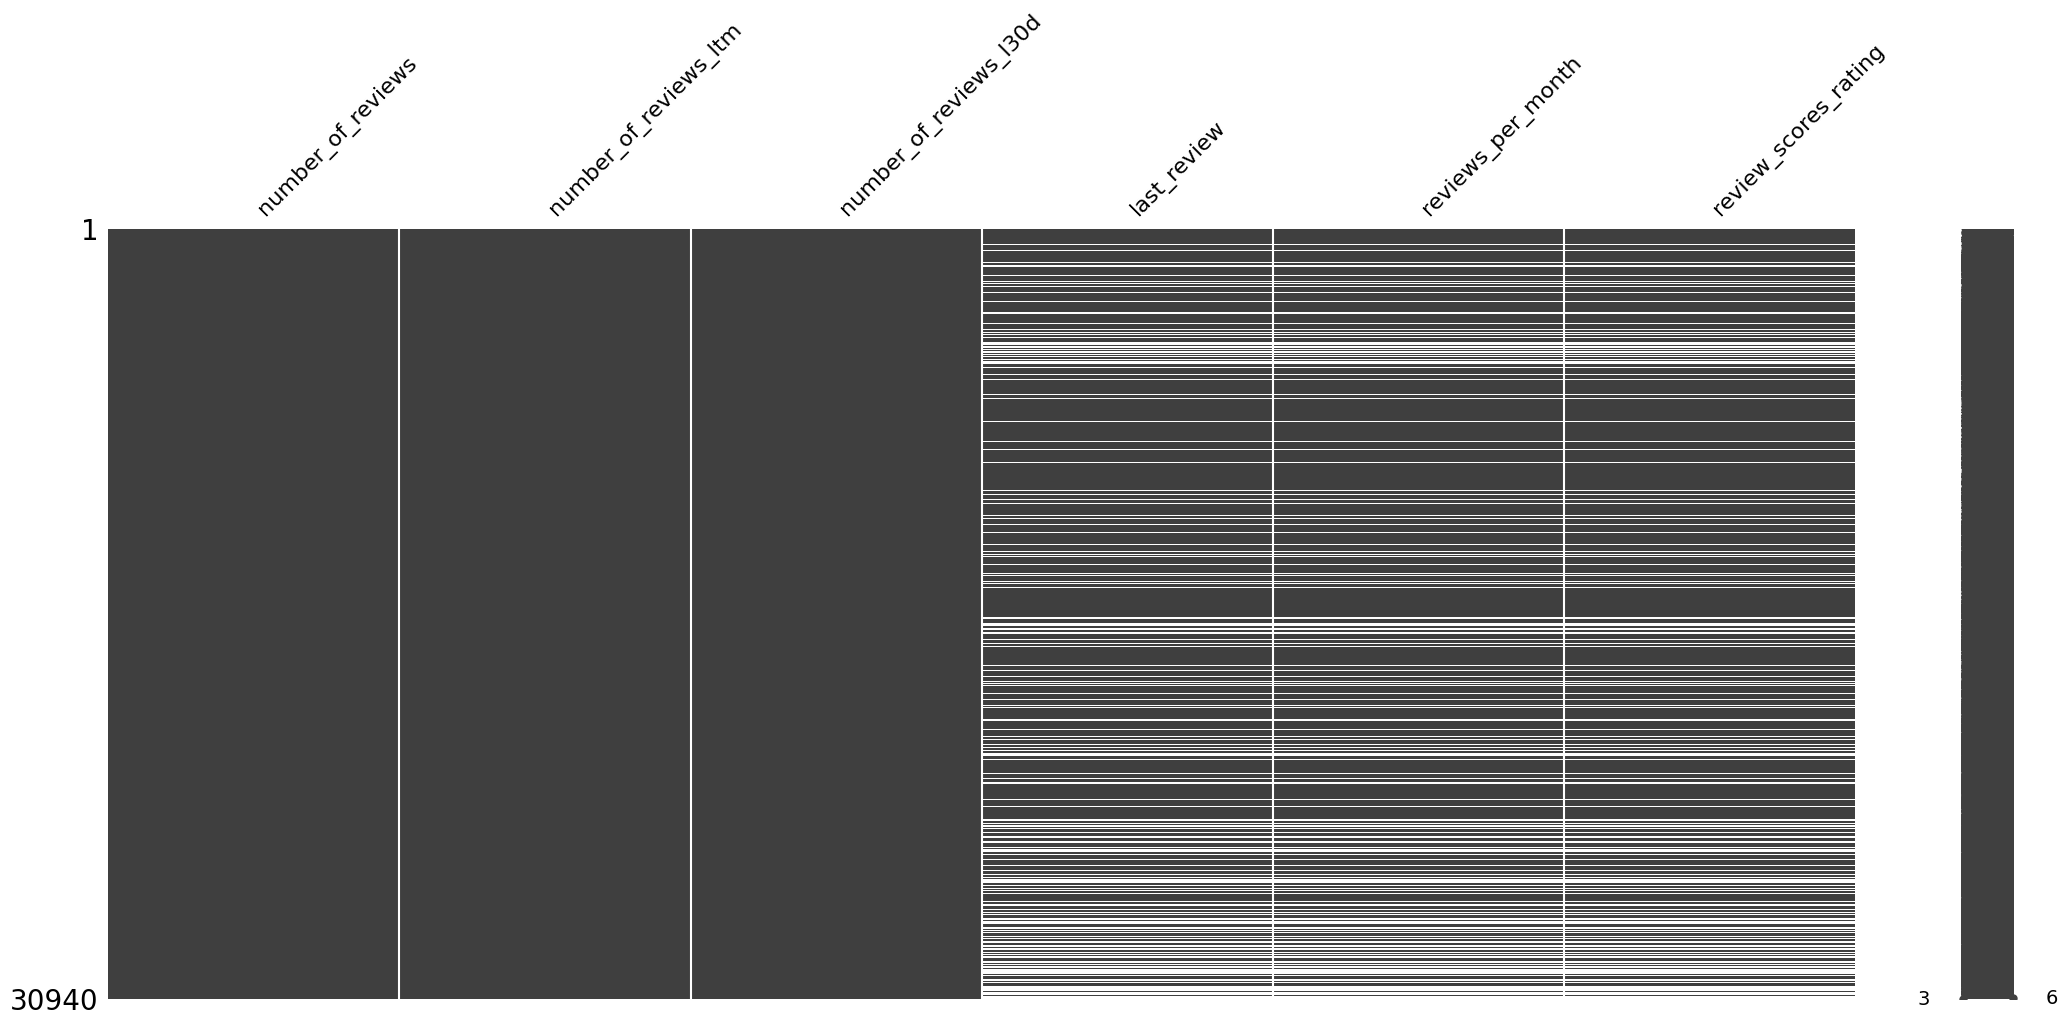

In [250]:
ms.matrix(ds_treated[colunas_review])

Notem que existem acomodações que nunca receberam uma avaliação e quando isso acontece não existem valores para data de última avaliação, revisões por mês e a própria pontuação média.

Vou verificar a quantidade de ocorrências de valores nulos para essas variáveis.

In [251]:
ds_treated[colunas_review].info()

<class 'pandas.core.frame.DataFrame'>
Index: 30940 entries, 0 to 31963
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_of_reviews       30940 non-null  int64  
 1   number_of_reviews_ltm   30940 non-null  int64  
 2   number_of_reviews_l30d  30940 non-null  int64  
 3   last_review             23630 non-null  object 
 4   reviews_per_month       23630 non-null  float64
 5   review_scores_rating    23630 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.7+ MB


**Reflexões sobre como tratar essa quantidade considerável de instâncias com valores nulos.**

23630 instâncias sem valores nulos representam um universo de 76% do total de 30940. Eu poderia abrir mão dos 24% para garantir um dataset preenchido para essas variáveis mas ao optar por isso, estaria perdendo informação sobre acomodações com total rejeição. Será que existe, por exemplo, um bairro do Rio de Janeiro com disponibilidade de acomodações mas onde nunca alguém fez um review tendo ficado hospedado por lá? Ou mesmo nenhum hóspede quis se hospedar por lá, mesmo com acomodações disponíveis. Existem características de uma acomodação que são definitivas para implicar em rejeição por parte dos hóspedes?

Por outro lado, ao não abrir mão dessas instâncias com valores nulos, como vou tratar esses dois pontos?

*   Eu gostaria de calcular a data em que uma acomodação ficou disponível na plataforma fazendo uma conta com as variáveis number_of_reviews e reviews_per_month. Se a primeira tem valor 10 e a segunda tem valor 1, eu poderia inferir que a acomodação existe há 10 meses, por exemplo. Não tendo valor para reviews_per_month, eu não consigo fazer essa conta. Saber a data de início da disponibilização da acomodação é importante para eu filtrar acomodações com menos de 12 meses pois vou usar a variável de reviews nos últimos 12 meses como variável alvo.
*   Eu também gostaria de usar valores significativos de pontuação das acomodações (review_scores_rating) como uma variável de influência no dataset. Como tratar então valores nulos para essa variável? Não posso preencher com zero por que a semântica desse valor é bem diferente do valor não existir.











**Ponto de decisão**: Para caminhar no sentido de simplificação e por entender que essa ação implica apenas em perda parcial de informação, vou optar por remover as instâncias com valores nulos para essas colunas. Elas representam 24% do dataset e a informação sobre rejeição de acomodações vai seguir presente no conjunto de dados, com a existência de número de reviews baixo e pontuações baixas.

In [252]:
# removendo instâncias com valores nulos para colunas de dados de review
ds_treated.dropna(subset=colunas_review, inplace=True)

In [253]:
#conferindo a remoção
ds_treated[colunas_review].info()

<class 'pandas.core.frame.DataFrame'>
Index: 23630 entries, 0 to 31919
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_of_reviews       23630 non-null  int64  
 1   number_of_reviews_ltm   23630 non-null  int64  
 2   number_of_reviews_l30d  23630 non-null  int64  
 3   last_review             23630 non-null  object 
 4   reviews_per_month       23630 non-null  float64
 5   review_scores_rating    23630 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.3+ MB


Vou converter a coluna last_review num dado do tipo datetime para poder executar operações adequadas com esse dado.

In [254]:
#convertendo em datetime
ds_treated[LAST_REVIEW] = pd.to_datetime(ds_treated[LAST_REVIEW],\
                                         format='%Y-%m-%d')

In [255]:
#conferindo o novo tipo de dado
ds_treated[colunas_review].info()

<class 'pandas.core.frame.DataFrame'>
Index: 23630 entries, 0 to 31919
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   number_of_reviews       23630 non-null  int64         
 1   number_of_reviews_ltm   23630 non-null  int64         
 2   number_of_reviews_l30d  23630 non-null  int64         
 3   last_review             23630 non-null  datetime64[ns]
 4   reviews_per_month       23630 non-null  float64       
 5   review_scores_rating    23630 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 1.3 MB


Vou adicionar uma nova coluna que vai conter a quantidade de meses desde que a acomodação foi registrada na plataforma Airbnb. Vou calcular esse valor usando valores presentes nas colunas reviews_per_month e number_of_reviews.

In [256]:
#analisando valores presentes
ds_treated[[NUMBER_OF_REVIEWS, REVIEWS_PER_MONTH]].head()

,number_of_reviews,reviews_per_month
0,78,0.54
1,29,0.20
2,76,0.65
3,301,1.87
4,272,1.68


In [257]:
# criando uma nova coluna no dataset para registrar a quantidade de meses
ds_treated[MONTHS_SINCE_REGISTERED] =\
    ds_treated.apply(calcula_meses_desde_registro, axis=1)

In [258]:
ds_treated[[NUMBER_OF_REVIEWS, REVIEWS_PER_MONTH, MONTHS_SINCE_REGISTERED]].head()

,number_of_reviews,reviews_per_month,months_since_registered
0,78,0.54,144
1,29,0.20,145
2,76,0.65,117
3,301,1.87,161
4,272,1.68,162


In [259]:
#analisando dados da nova coluna criada
ds_treated[MONTHS_SINCE_REGISTERED].describe()

count    23630.000000
mean        36.271731
std         34.443444
min          1.000000
25%          9.000000
50%         21.000000
75%         57.000000
max        200.000000
Name: months_since_registered, dtype: float64

Notem que existe uma acomodação com 200 meses de registrada, ou seja, mais de 16 anos e meio. A plataforma Airbnb foi fundada em 2008 o que dá 15 anos se consideramos o momento da extração do dataset, ano 2023. Além disso, ela opera no Brasil desde 2012, o que dá aproximadamente 11 anos. Parece haver alguma inconsistência no dado mas não vou eliminar essas instâncias no escopo desse trabalho.

Vou agora analisar quantas acomodações tem menos de 12 meses.

In [260]:
menos_de_doze = (ds_treated[MONTHS_SINCE_REGISTERED] < 12).sum()

print(f'Quantidade menor do que 12: {menos_de_doze}')

Quantidade menor do que 12: 7308


Como quero usar a variável de quantidade de reviews nos últimos 12 meses como um dado para gerar a minha variável alvo, preciso remover do dataset aquelas acomodações com existência na plataforma menor do que esse período.

In [261]:
# removendo linhas com menos de 12 meses
ds_treated = ds_treated[ds_treated[MONTHS_SINCE_REGISTERED] >= 12]

In [262]:
#analisando novamente os dados da nova coluna criada
ds_treated[MONTHS_SINCE_REGISTERED].describe()

count    16322.000000
mean        49.807928
std         33.479740
min         12.000000
25%         20.000000
50%         45.000000
75%         75.000000
max        200.000000
Name: months_since_registered, dtype: float64

Como foram retiradas as instâncias com menos de 12 meses, os valores dos quartis e a média aumentaram significativamente

Agora que já obtive o dado referente ao tempo em que a acomodação está presente na plataforma e o utilizei para remover aquelas com menos de 12 meses, vou remover todas as colunas com dados sobre reviews exceto aquela a ser usada para a geração da variável alvo e a de score, numa abordagem de **feature selection não supervisionada**.

In [263]:
ds_treated.drop([NUMBER_OF_REVIEWS, NUMBER_OF_REVIEWS_L30D, LAST_REVIEW, \
                  REVIEWS_PER_MONTH], axis=1, inplace= True)

Também vou remover o atributo novo criado apenas temporariamente.

In [264]:
ds_treated.drop([MONTHS_SINCE_REGISTERED], axis=1, inplace= True)

##### Instant_bookable

Analisando a última coluna da entidade Acomodação e aplicando os devidos tratamentos.

In [265]:
# analisando primeiros valores
ds_treated[INSTANT_BOOKABLE].head(10)

0    f
1    f
2    f
3    f
4    f
5    t
6    f
7    f
8    f
9    t
Name: instant_bookable, dtype: object

In [266]:
# verificando distribuição
ds_treated[INSTANT_BOOKABLE].value_counts()

instant_bookable
f    12482
t     3840
Name: count, dtype: int64

In [267]:
#convertendo para tipo bool
ds_treated[INSTANT_BOOKABLE] =\
    ds_treated[INSTANT_BOOKABLE].map({'t': True, 'f': False})

In [268]:
#analisando resultado do ajuste de tipagem
ds_treated[INSTANT_BOOKABLE].head(10)

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9     True
Name: instant_bookable, dtype: bool

#### 4.3.3 Tratamento na entidade Localização da Acomodação

Essa entidade ficou com apenas dois atributos e isso simplificou as ações de tratamento.

##### Neighbourhood_overview

Analisando a coluna neighbourhood_overview.

In [269]:
ds_treated[NEIGHBORHOOD_OVERVIEW].head()

0                                                  NaN
1                                                  NaN
2    Copacabana, apelidada a princesinha do mar, fa...
3    This is the one of the bests spots in Rio. Bec...
4    Copacabana is a lively neighborhood and the ap...
Name: neighborhood_overview, dtype: object

Como mencionado em seções anteriores, para algumas variáveis eu vou adotar a estratégia de considerar que o fato dela ter valor preenchido já serve de indicativo para fator de influência. Não farei uma análise no dado em si.

A variável neighborhood_overview se encaixa nesse cenário.

Criarei uma coluna nova preenchendo-a com valores booleanos correspondentes e depois excluirei a coluna original.

In [270]:
# criando uma coluna nova e convertando para booleano para indicar que a
# variável neighbourhood_overview tem valor preenchido
ds_treated[HAS_NEIGHBOURHOOD_OVERVIEW] =\
    ds_treated[NEIGHBORHOOD_OVERVIEW].notna()

In [271]:
#conferindo o resultado nas primeiras linhas
ds_treated[[NEIGHBORHOOD_OVERVIEW, HAS_NEIGHBOURHOOD_OVERVIEW]].head()

,neighborhood_overview,has_neighbourhood_overview
0,NaN,False
1,NaN,False
2,"Copacabana, apelidada a princesinha do mar, fa...",True
3,This is the one of the bests spots in Rio. Bec...,True
4,Copacabana is a lively neighborhood and the ap...,True


In [272]:
# removendo coluna original neighborhood_overview
ds_treated.drop([NEIGHBORHOOD_OVERVIEW], axis=1, inplace= True)

##### Neighbourhood_cleansed

Essa coluna contém nomes dos bairros que foram calculados a partir dos dados de latitude e longitude, cálculo esse feito pelo site Inside Airbnb. A cidade do Rio de Janeiro tem 164 bairros, segundo a [Wikipedia](https://pt.wikipedia.org/wiki/Lista_de_bairros_da_cidade_do_Rio_de_Janeiro).

Vou agora analisar a coluna neighbourhood_cleansed do dataset.

In [273]:
ds_treated[NEIGHBOURHOOD_CLEANSED].info()

<class 'pandas.core.series.Series'>
Index: 16322 entries, 0 to 22388
Series name: neighbourhood_cleansed
Non-Null Count  Dtype 
--------------  ----- 
16322 non-null  object
dtypes: object(1)
memory usage: 255.0+ KB


Notem a ausência de valores nulos para essa coluna. Existem valores preenchidos para todas as 16322 entradas.

In [274]:
# verificando valores únicos para bairros para comparar com
# total de bairros da cidade
print("Quantidade de bairros:", ds_treated[NEIGHBOURHOOD_CLEANSED].nunique())

Quantidade de bairros: 132


Como existem 132 bairros presentes e a cidade tem 164 bairros, posso concluir que no estado atual do meu dataset, nem todo bairro do Rio de Janeiro está presente.

Vou verificar a contagem por bairro.

In [275]:
#listando os bairros presentes, em ordem de quantidade de acomodações
ds_treated[NEIGHBOURHOOD_CLEANSED].value_counts()

neighbourhood_cleansed
Copacabana                  5270
Ipanema                     1777
Barra da Tijuca             1606
Leblon                       866
Jacarepaguá                  833
Botafogo                     760
Recreio dos Bandeirantes     700
Santa Teresa                 586
Centro                       474
Flamengo                     376
Leme                         332
Laranjeiras                  217
Tijuca                       195
Camorim                      167
Catete                       134
Glória                       134
Lagoa                        113
Gávea                        104
Jardim Botânico              102
Humaitá                       89
Vidigal                       75
São Conrado                   72
Urca                          72
Barra de Guaratiba            71
Taquara                       59
Itanhangá                     58
Freguesia (Jacarepaguá)       53
Vila Isabel                   52
Joá                           48
Vargem Pequena      

In [276]:
# fazendo agora a mesma listagem mas ordenando pelos nomes dos bairros,
# para tentar identificar uma possível ocorrência de bairros repetidos
# escritos de maneira similar.
ds_treated[NEIGHBOURHOOD_CLEANSED].value_counts().sort_index()

neighbourhood_cleansed
Alto da Boa Vista             23
Andaraí                       12
Anil                          22
Bancários                      3
Bangu                          4
Barra da Tijuca             1606
Barra de Guaratiba            71
Benfica                        2
Bento Ribeiro                  4
Bonsucesso                     3
Botafogo                     760
Brás de Pina                  11
Cachambi                      14
Cacuia                         7
Camorim                      167
Campinho                       3
Campo Grande                  41
Catete                       134
Catumbi                        6
Centro                       474
Cidade Nova                    7
Cidade de Deus                 2
Cocotá                         1
Coelho Neto                    2
Complexo do Alemão             1
Copacabana                  5270
Cosme Velho                   43
Cosmos                         5
Curicica                      45
Del Castilho        

Numa análise da lista, não parece acontecer o cenário mencionado, de bairros duplicados. É interessante notar a presença na lista de alguns bairros não tão conhecidos, como [Higienópolis](https://pt.wikipedia.org/wiki/Higien%C3%B3polis_(bairro_do_Rio_de_Janeiro)) (não é de São Paulo) e [Tauá](https://pt.wikipedia.org/wiki/Tau%C3%A1_(bairro)).

Vou criar uma variável com a lista de bairros para usar numa seção subsequente.

In [277]:
# criando variável com a lista de bairros
bairros_referencia = sorted(ds_treated[NEIGHBOURHOOD_CLEANSED].unique())

#### 4.3.4 Tratamento na entidade Anfitrião

A entidade Anfitrião engloba as variáveis host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_neighbourhood, host_total_listings_count e host_identity_verified.

Analisarei e farei os devidos tratamentos nessas variáveis nas próximas seções. Para começar, uma visão de matriz apenas das variáveis de Anfitrião.

<Axes: >

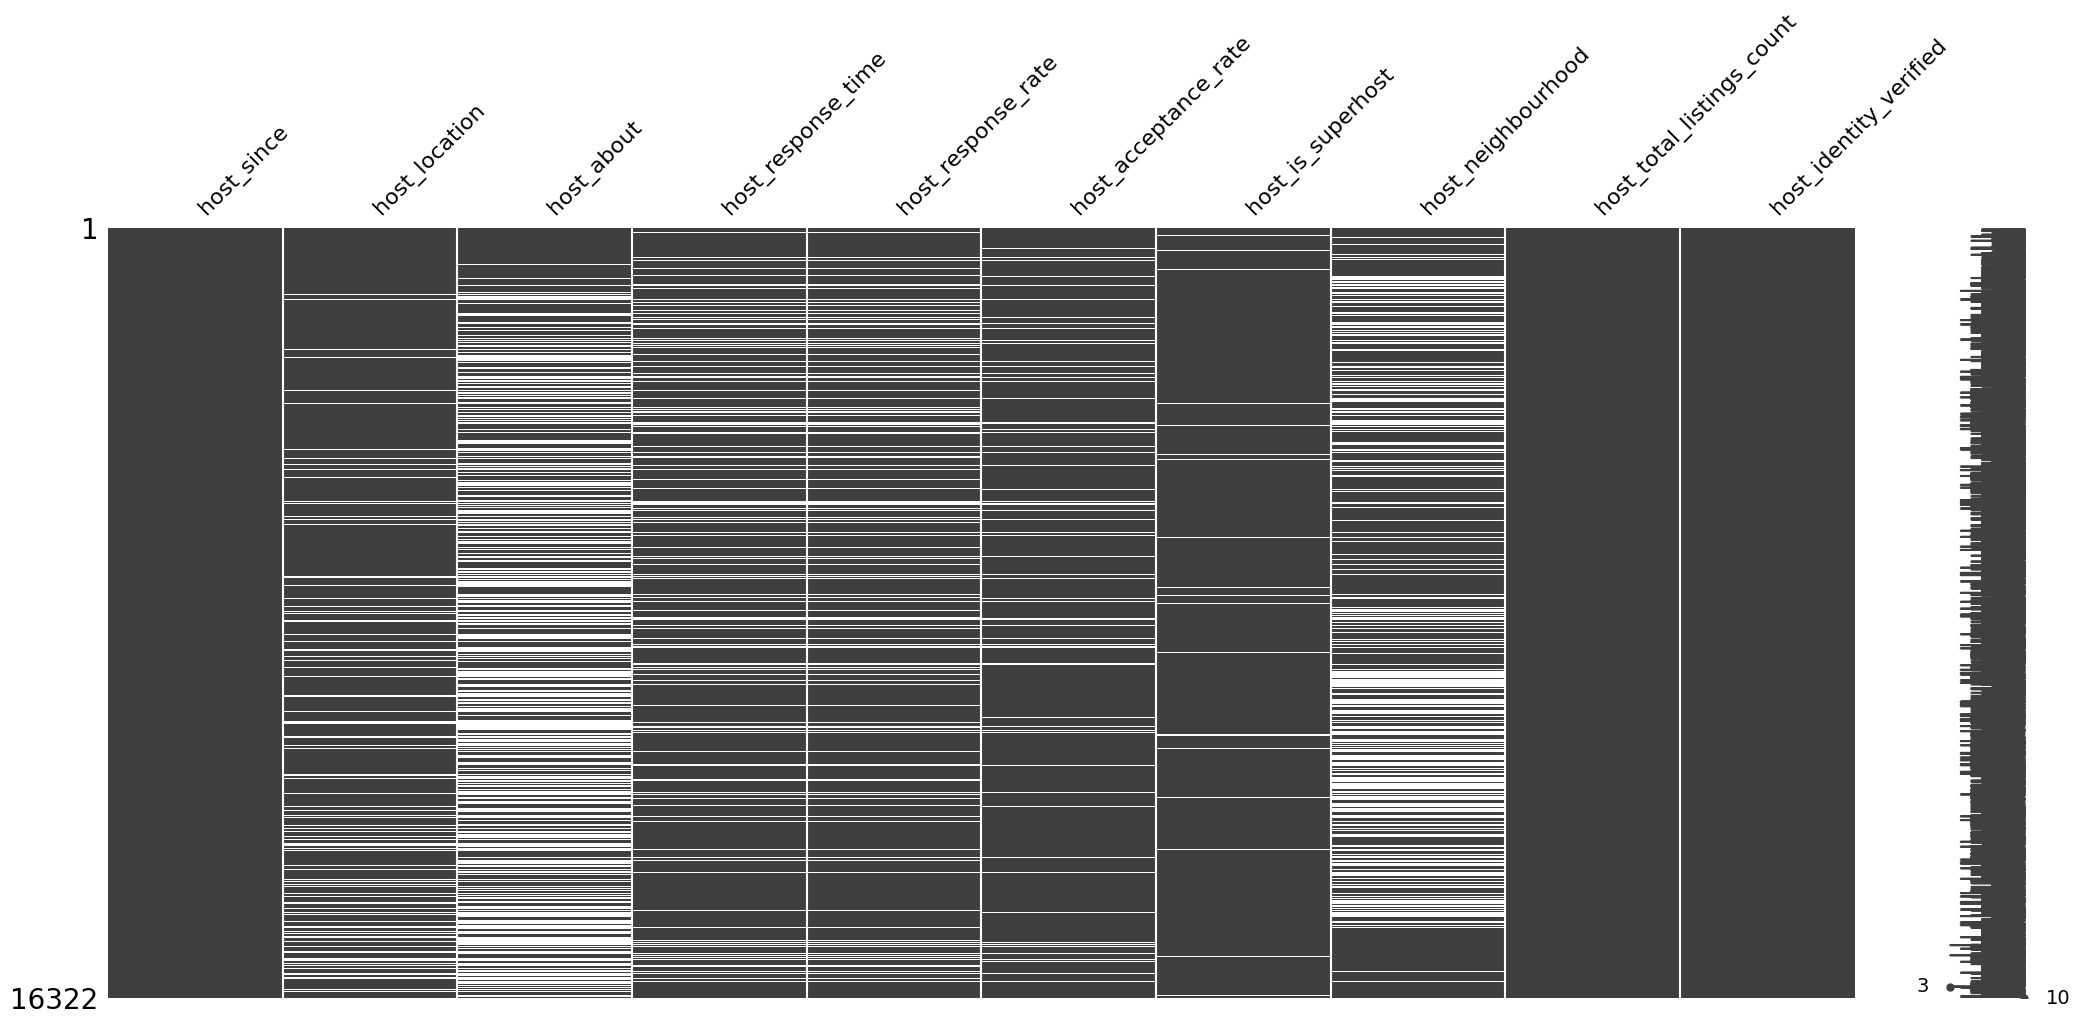

In [278]:
#lista com colunas da entidade Anfitrião
colunas_host = [HOST_SINCE, HOST_LOCATION, HOST_ABOUT, HOST_RESPONSE_TIME,\
                HOST_RESPONSE_RATE, HOST_ACCEPTANCE_RATE, HOST_IS_SUPERHOST,\
                HOST_NEIGHBOURHOOD, HOST_TOTAL_LISTINGS_COUNT,\
                HOST_IDENTITY_VERIFIED]

# matriz apenas dos dados dessa entidade
ms.matrix(ds_treated[colunas_host])

Notem a presença de valores nulos para boa parte das variáveis envolvidas.

##### Host_since

A variável host_since indica em que momento o anfitrião se registrou na plataforma, seja para ofertar acomodações, seja para se hospedar. Vou manter esse dado no dataset por considerar que mais tempo de relação com a plataforma pode indicar mais habilidade de gerir estadias e isso levar a uma melhor taxa de ocupação.

Análise inicial da variável.

In [279]:
# verificando nulos da variável host_since
ds_treated[HOST_SINCE].info()

<class 'pandas.core.series.Series'>
Index: 16322 entries, 0 to 22388
Series name: host_since
Non-Null Count  Dtype 
--------------  ----- 
16322 non-null  object
dtypes: object(1)
memory usage: 255.0+ KB


Todas as instâncias contém dados e o tipo do dado é object.

Agora vou analisar o conteúdo em si e seu formato.

In [280]:
ds_treated[HOST_SINCE].head()

0    2011-09-25
1    2011-09-25
2    2011-10-03
3    2010-01-08
4    2010-04-03
Name: host_since, dtype: object

Vou modificar o tipo do dado para datetime.

In [281]:
#convertendo em datetime
ds_treated[HOST_SINCE] =\
    pd.to_datetime(ds_treated[HOST_SINCE], format='%Y-%m-%d')

Analisando agora o resultado.

In [282]:
ds_treated[HOST_SINCE].head()

0   2011-09-25
1   2011-09-25
2   2011-10-03
3   2010-01-08
4   2010-04-03
Name: host_since, dtype: datetime64[ns]

##### Host_location e host_neighbourhood

Essas variáveis indicam a localização do anfitrião em níveis de granularidade diferentes. A análise feita no MVP do sprint anterior mostrou que a localização do anfitrião exerce pouca ou nenhuma influência na quantidade de reviews, que é a variável alvo. Portanto, vou remover esses atributos numa **abordagem não supervisionada**.

In [283]:
# removendo HOST_LOCATION e HOST_NEIGHBOURHOOD
ds_treated.drop([HOST_LOCATION, HOST_NEIGHBOURHOOD], axis=1, inplace= True)

##### Host_about

Essa variável contém uma apresentação do anfitrião sobre si e minha hipótese é que quando esses valores estão preenchidos, a taxa de ocupação melhora devido a um aumento de confiança por parte do hóspede.

Vou então criar uma nova coluna para indicar apenas que essa descrição está preenchida, não entrando no mérito de avaliar o conteúdo preenchido.

In [284]:
# criando uma coluna nova e convertando para booleano para indicar que a
# variável host_about tem valor preenchido
ds_treated[HAS_HOST_ABOUT] = ds_treated[HOST_ABOUT].notna()

E agora removo a coluna original.

In [285]:
# removendo coluna original host_about
ds_treated.drop([HOST_ABOUT], axis=1, inplace= True)

<Axes: >

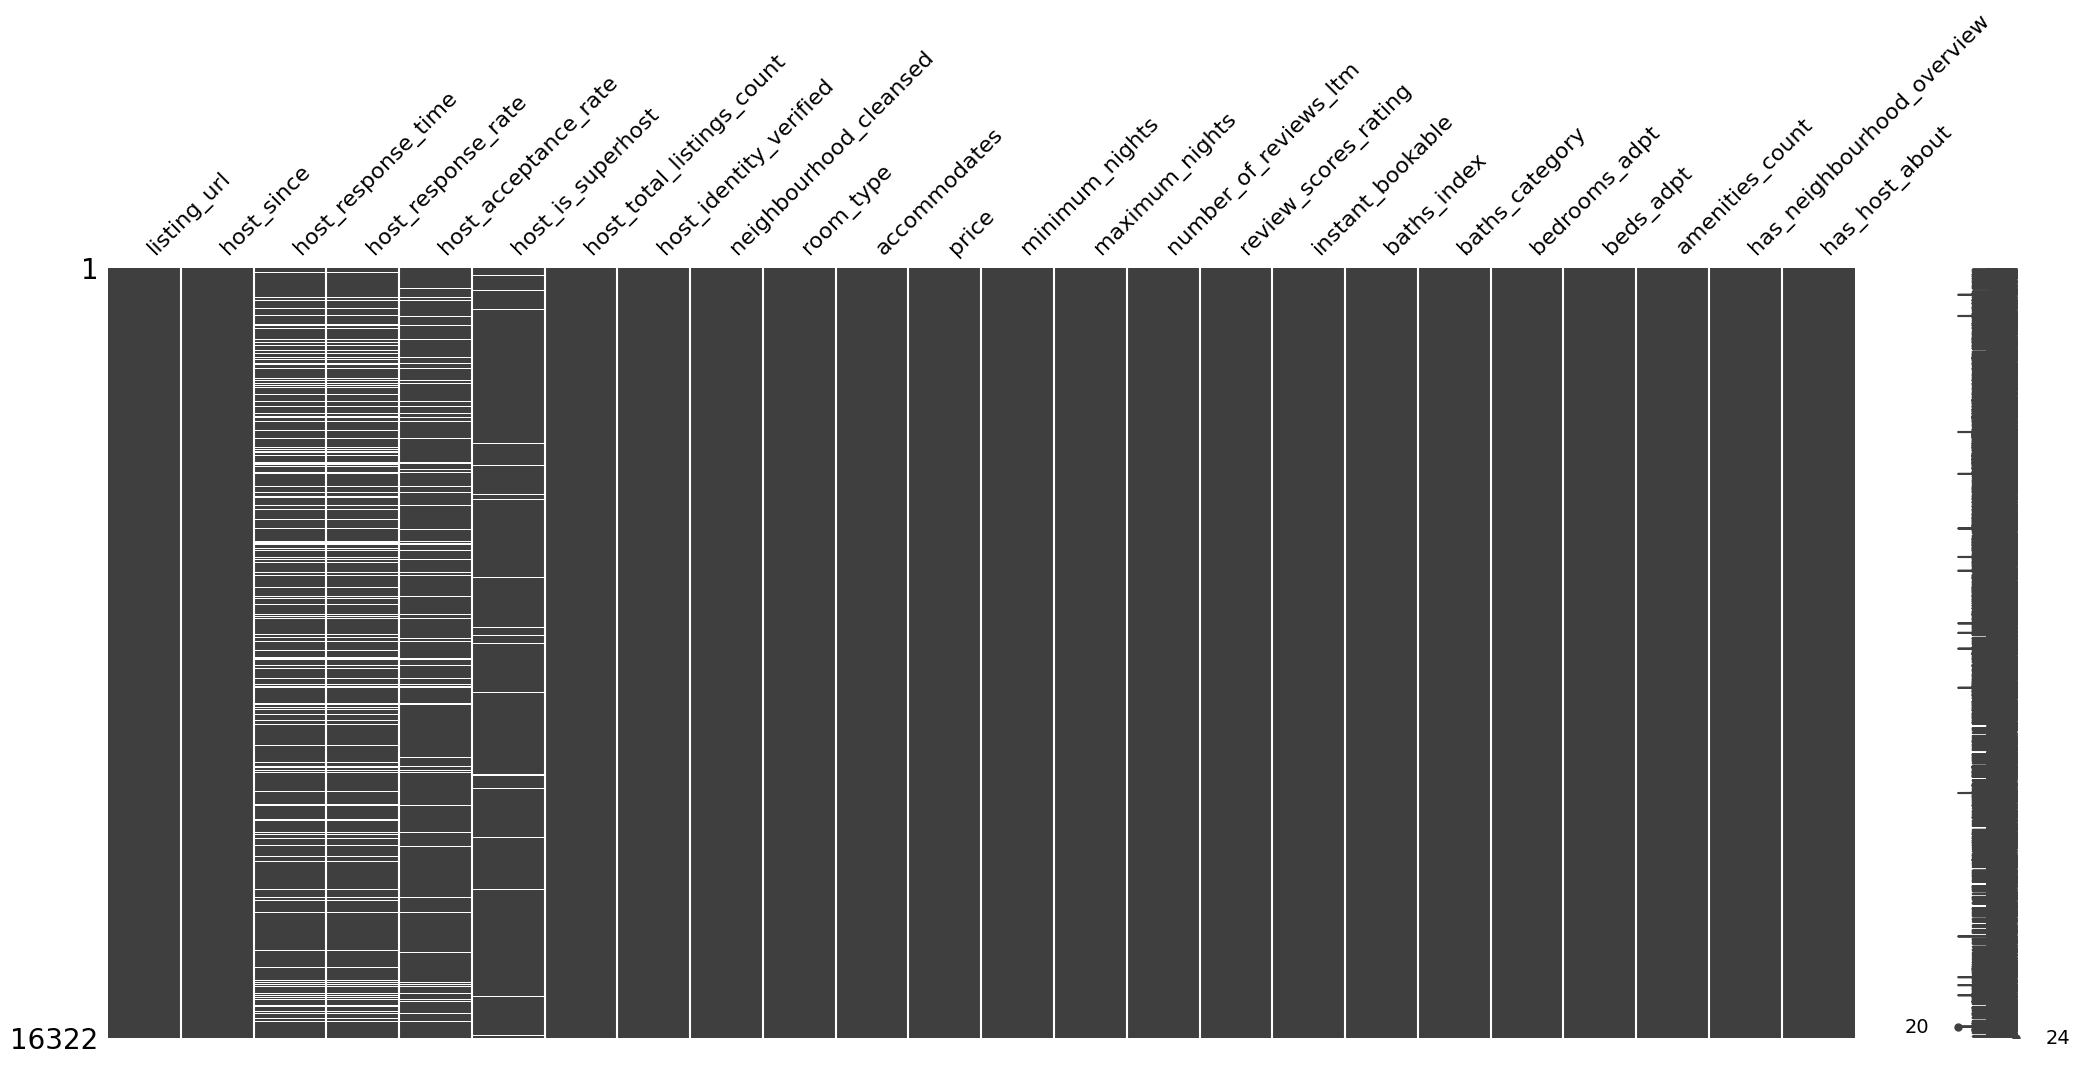

In [286]:
ms.matrix(ds_treated)

##### Host_response_time, host_response_rate e host_acceptance_rate

Essas variáveis englobam indicadores de reação do anfitrião perante interações dos possíveis hóspedes.

Faço agora uma análise inicial.

In [287]:
ds_treated[[HOST_RESPONSE_TIME, HOST_RESPONSE_RATE, HOST_ACCEPTANCE_RATE]].head(40)

,host_response_time,host_response_rate,host_acceptance_rate
0,within a few hours,100%,82%
1,within a few hours,100%,82%
2,within an hour,100%,96%
3,within an hour,100%,96%
4,within a few hours,100%,73%
5,within an hour,100%,100%
6,within an hour,100%,97%
7,within an hour,100%,96%
8,within a few hours,100%,83%
9,within an hour,100%,97%


Notem que as 3 variáveis podem conter valores nulos e que a variável host_response_time é uma variável categórica.

In [288]:
ds_treated[[HOST_RESPONSE_TIME, HOST_RESPONSE_RATE,\
            HOST_ACCEPTANCE_RATE]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 16322 entries, 0 to 22388
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   host_response_time    13767 non-null  object
 1   host_response_rate    13767 non-null  object
 2   host_acceptance_rate  14867 non-null  object
dtypes: object(3)
memory usage: 510.1+ KB


Vou optar por remover as linhas onde não há dado sobre tempo e taxa de resposta do anfitrião além de taxa de aceitação. Entendo que essas variáveis podem influenciar nas taxas de ocupação e prefiro remover do dataset as instâncias que não tem esse dado.

In [289]:
# removendo instâncias com valores nulos para colunas host_responde_time,
# host_response_rate e host_acceptance_rate
colunas = [HOST_RESPONSE_TIME, HOST_RESPONSE_RATE, HOST_ACCEPTANCE_RATE]
ds_treated.dropna(subset=colunas, inplace=True)

Agora vou fazer os ajustes de tipagem e de conteúdo nessas colunas.

In [290]:
# convertendo o tipo de host_response_time para o tipo category
ds_treated[HOST_RESPONSE_TIME] =\
    ds_treated[HOST_RESPONSE_TIME].astype('category')

In [291]:
# Tratando as colunas host_response_rate e host_acceptance_rate
ds_treated[HOST_RESPONSE_RATE] =\
    ds_treated[HOST_RESPONSE_RATE].str.replace('%', '').astype(int)
ds_treated[HOST_ACCEPTANCE_RATE] =\
    ds_treated[HOST_ACCEPTANCE_RATE].str.replace('%', '').astype(int)

Conferindo o resultado dos ajustes

In [292]:
ds_treated[[HOST_RESPONSE_TIME, HOST_RESPONSE_RATE,\
            HOST_ACCEPTANCE_RATE]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13545 entries, 0 to 22388
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   host_response_time    13545 non-null  category
 1   host_response_rate    13545 non-null  int64   
 2   host_acceptance_rate  13545 non-null  int64   
dtypes: category(1), int64(2)
memory usage: 330.9 KB


In [293]:
ds_treated[[HOST_RESPONSE_TIME, HOST_RESPONSE_RATE,\
            HOST_ACCEPTANCE_RATE]].head()

,host_response_time,host_response_rate,host_acceptance_rate
0,within a few hours,100,82
1,within a few hours,100,82
2,within an hour,100,96
3,within an hour,100,96
4,within a few hours,100,73


##### Host_is_superhost

Análise inicial na variável.

In [294]:
# analisando primeiros valores
ds_treated[HOST_IS_SUPERHOST].head(10)

0    f
1    f
2    t
3    t
4    t
5    t
6    f
7    t
8    f
9    t
Name: host_is_superhost, dtype: object

In [295]:
# verificando distribuição
ds_treated[HOST_IS_SUPERHOST].value_counts()

host_is_superhost
f    7634
t    5557
Name: count, dtype: int64

Vou tratar convertando para tipo booleano mapeando valor f e nulo para False e t para True.

In [296]:
#convertendo para tipo bool
ds_treated[HOST_IS_SUPERHOST] =\
  ds_treated[HOST_IS_SUPERHOST].map({'t': True, 'f': False}).fillna(False)

In [297]:
# verificando o resultado
ds_treated[HOST_IS_SUPERHOST].head(10)

0    False
1    False
2     True
3     True
4     True
5     True
6    False
7     True
8    False
9     True
Name: host_is_superhost, dtype: bool

##### Host_total_listings_count

Variável que informa a quantidade de acomodações sendo gerenciadas pelo anfitrião.

In [298]:
# analisando a variável
ds_treated[HOST_TOTAL_LISTINGS_COUNT].info()

<class 'pandas.core.series.Series'>
Index: 13545 entries, 0 to 22388
Series name: host_total_listings_count
Non-Null Count  Dtype  
--------------  -----  
13545 non-null  float64
dtypes: float64(1)
memory usage: 211.6 KB


Nenhum ação necessária por hora por que não existem valores nulos e a tipagem está correta.

##### Host_identity_verified

Variável que informa sobre a verificação de identidade do anfitrião.

In [299]:
# analisando a variável
ds_treated[HOST_IDENTITY_VERIFIED].info()

<class 'pandas.core.series.Series'>
Index: 13545 entries, 0 to 22388
Series name: host_identity_verified
Non-Null Count  Dtype 
--------------  ----- 
13545 non-null  object
dtypes: object(1)
memory usage: 211.6+ KB


In [300]:
# analisando primeiros valores
ds_treated[HOST_IDENTITY_VERIFIED].head(10)

0    t
1    t
2    t
3    t
4    t
5    t
6    t
7    t
8    t
9    t
Name: host_identity_verified, dtype: object

In [301]:
#convertendo para tipo bool
ds_treated[HOST_IDENTITY_VERIFIED] =\
    ds_treated[HOST_IDENTITY_VERIFIED].map({'t': True, 'f': False})

In [302]:
# analisando o resultado
ds_treated[HOST_IDENTITY_VERIFIED].value_counts()

host_identity_verified
True     11617
False     1928
Name: count, dtype: int64

#### 4.3.5 Análise final da sessão

In [303]:
ds_treated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13545 entries, 0 to 22388
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   listing_url                 13545 non-null  object        
 1   host_since                  13545 non-null  datetime64[ns]
 2   host_response_time          13545 non-null  category      
 3   host_response_rate          13545 non-null  int64         
 4   host_acceptance_rate        13545 non-null  int64         
 5   host_is_superhost           13545 non-null  bool          
 6   host_total_listings_count   13545 non-null  float64       
 7   host_identity_verified      13545 non-null  bool          
 8   neighbourhood_cleansed      13545 non-null  object        
 9   room_type                   13545 non-null  object        
 10  accommodates                13545 non-null  int64         
 11  price                       13545 non-null  float64       


Vou converter campos que podem ser do tipo category que ainda restaram.

In [304]:
# convertendo para o tipo category
ds_treated[NEIGHBOURHOOD_CLEANSED] =\
    ds_treated[NEIGHBOURHOOD_CLEANSED].astype('category')
ds_treated[ROOM_TYPE] = ds_treated[ROOM_TYPE].astype('category')
ds_treated[BATHS_CATEGORY] = ds_treated[BATHS_CATEGORY].astype('category')

Mais uma visualização em forma de matriz

<Axes: >

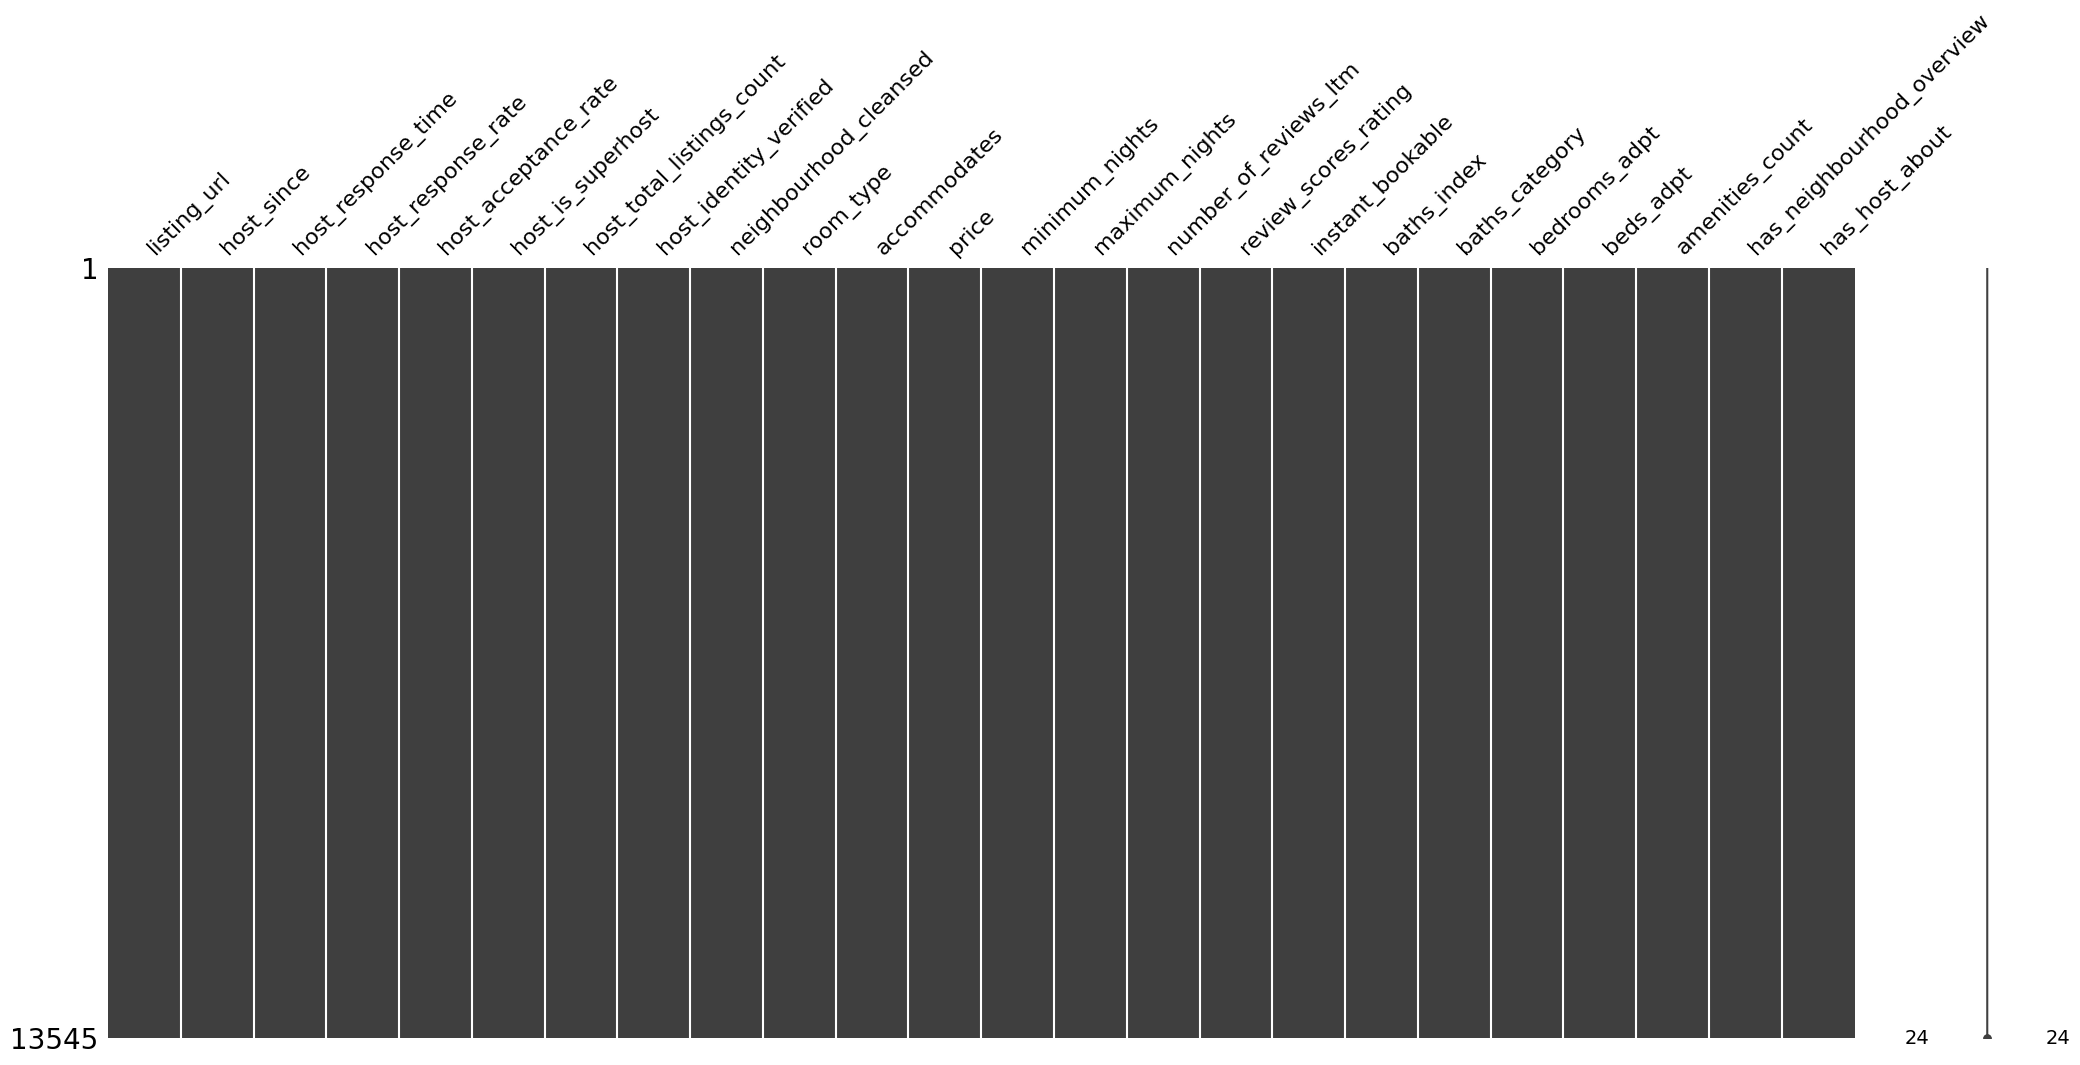

In [305]:
ms.matrix(ds_treated)

Vou fazer um último ajuste posicionando as colunas do dataset de acordo com as entidades com as quais estou trabalhando e também aproximando colunas correlatas.

In [306]:
#colunas Acomodação
colunas_acomodacao = [LISTING_URL, ROOM_TYPE, ACCOMMODATES, BEDROOMS_ADPT,\
                      BEDS_ADPT, BATHS_INDEX, BATHS_CATEGORY, AMENITIES_COUNT,\
                      PRICE, MINIMUM_NIGHTS, MAXIMUM_NIGHTS,\
                      REVIEW_SCORES_RATING, NUMBER_OF_REVIEWS_LTM, \
                      INSTANT_BOOKABLE]

#colunas Localização da Acomodação
colunas_localizacao = [NEIGHBOURHOOD_CLEANSED, HAS_NEIGHBOURHOOD_OVERVIEW]

#colunas Anfitrião
colunas_anfitriao = [HOST_SINCE, HOST_TOTAL_LISTINGS_COUNT,\
                     HOST_RESPONSE_TIME, HOST_RESPONSE_RATE,\
                     HOST_ACCEPTANCE_RATE, HOST_IS_SUPERHOST,\
                     HOST_IDENTITY_VERIFIED, HAS_HOST_ABOUT]

#definindo a ordem dos grupos
colunas_ordenadas = colunas_acomodacao + colunas_localizacao + colunas_anfitriao

#reposicionando as colunas
ds_treated = ds_treated[colunas_ordenadas]

<Axes: >

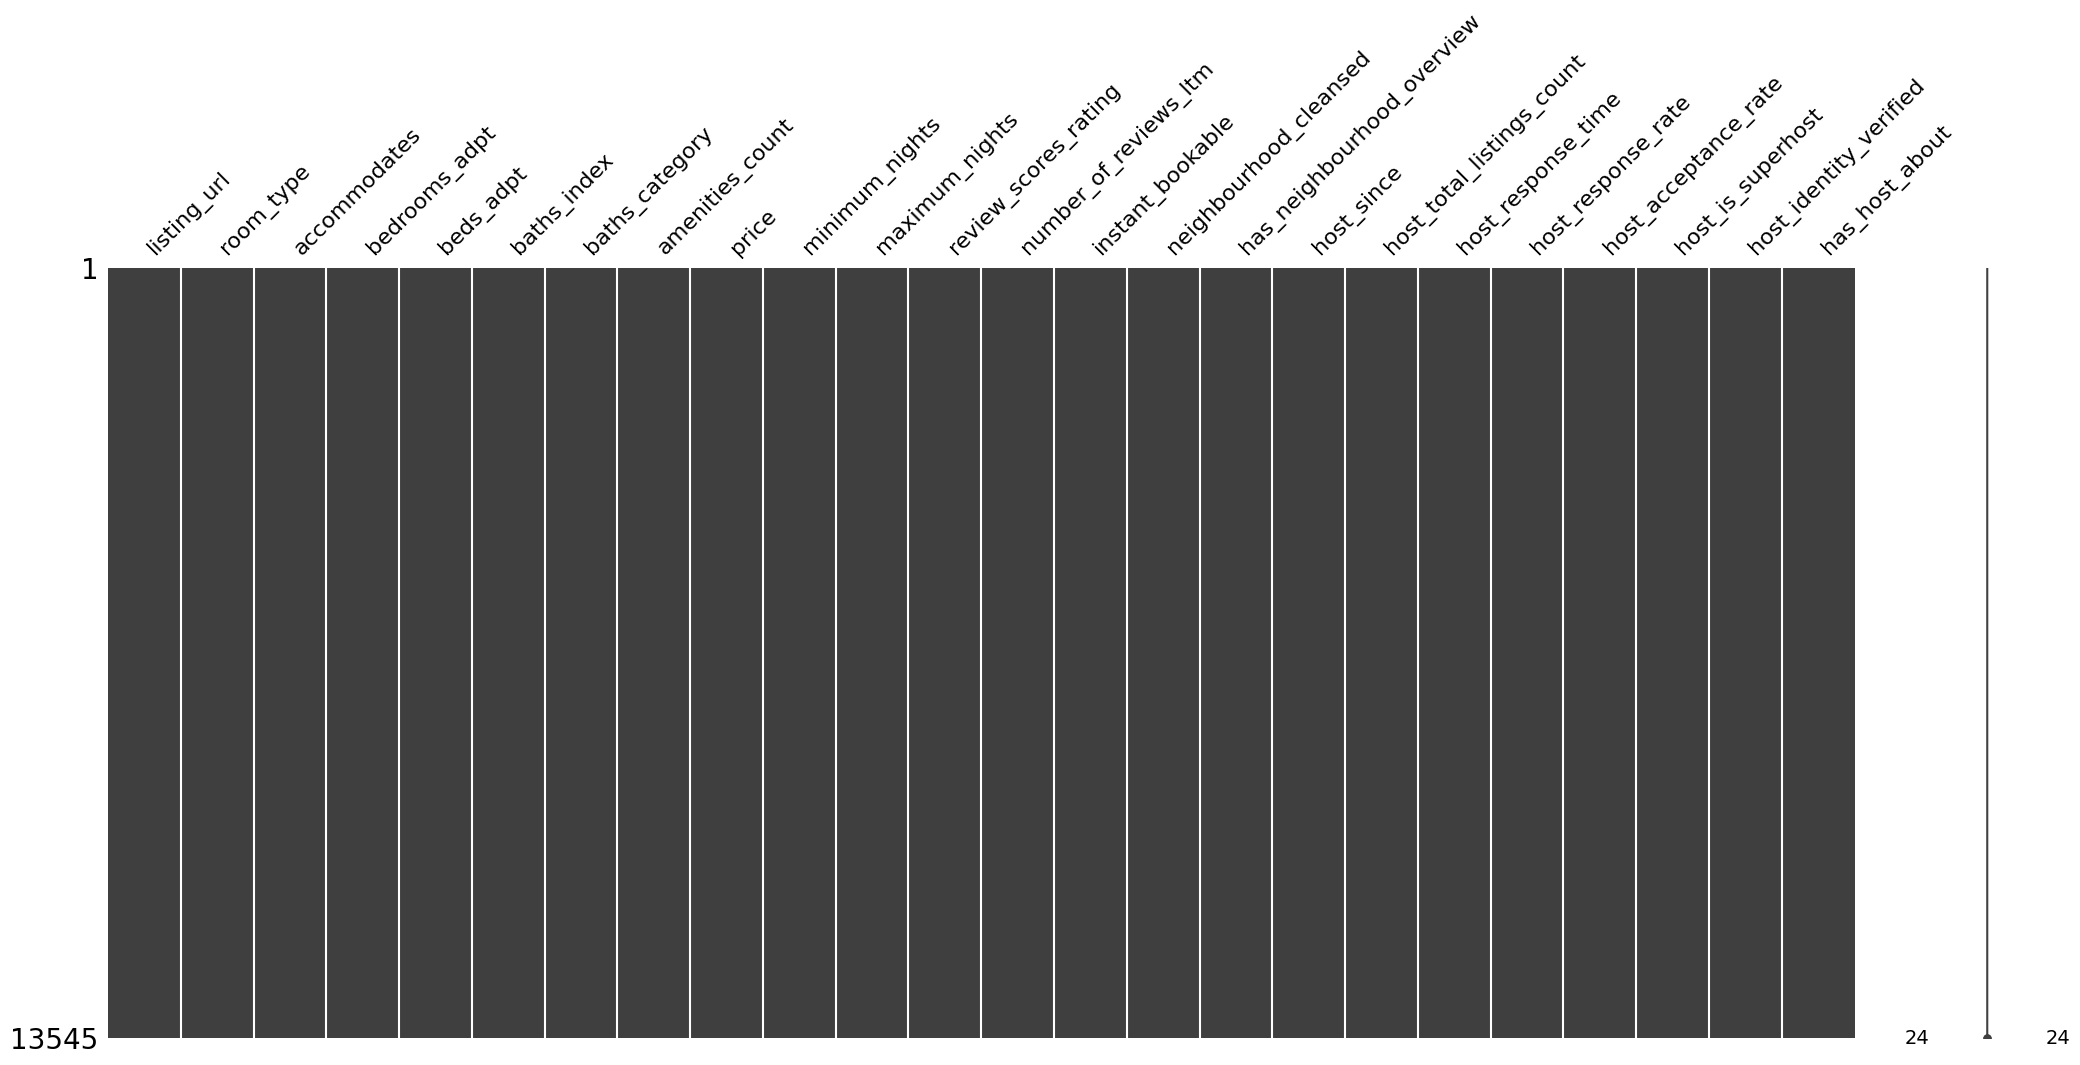

In [307]:
ms.matrix(ds_treated)

### 4.4 Dicionário de dados

Incluo o dicionário de dados nesse trecho do notebook por que as variáveis presentes nesse momento no dataset são aquelas que sobreviveram a todas as ações de limpeza e serão profundamente trabalhadas nas próximas seções. Até aqui foram executadas ações de seleção de atributos de maneira não supervisionada e nas seções seguintes poderei ainda executar ações de seleção de atributos usando técnicas supervisionadas, ou apenas deixar que os algoritmos de machine learning selecionados façam isso por mim, de acordo com suas características.

**Informações sobre os atributos:**
1. **listing_url** - URL da acomodação no site Airbnb.
2. **room_type** - Categoria da acomodação podendo ser 'Entire home/apt', 'Private room', 'Shared Room' ou 'Hotel room'.
3. **accommodates** - Quantidade máxima de hóspedes aceitos na acomodação. O limite inferior é 1 e o superior é 16.
4. **bedrooms_adpt** - Quantidade de quartos disponíveis na acomodação. Quando o tipo de acomodação for quarto compartilhado, esse campo recebe um valor fracionado inversamente proporcional a quantidade de hóspedes.
5. **beds_adpt** - Quantidade de camas disponíveis na acomodação.
6. **baths_index** - Valor numérico que representa a quantidade de banheiros disponíveis por hóspede.
7. **baths_category** - Categoria de banheiro, podendo ser 'dedicated', 'shared' ou 'no_bathroom'.
8. **amenities_count** - Quantidade de comodidades oferecidas na acomodação.
9. **price** - Valor numérico indicando o preço padrão em reais (R$) para a diária da acomodação. O preço pode ser diferente em períodos específicos mas aqui considerou-se apenas o valor padrão.
10. **minimum_nights** - Quantidade mínima de noites definida como padrão para a acomodação. O anfitrião pode configurar valores mínimos diferentes para períodos específicos mas nesse trabalho levamos em consideração apenas o valor padrão.
11. **maximum_nights** - Quantidade máxima de noites definida como padrão para a acomodação. O anfitrião pode configurar valores máximos diferentes para períodos específicos mas nesse trabalho levamos em consideração apenas o valor padrão.
12. **review_scores_rating** - Valor numérico que indica a pontuação da avaliação feita pelo hóspedes para a acomodação. Pode variar entre 0 e 5.
13. **number_of_reviews** - Quantidade total de avaliações feitas por hóspedes ao longo da vida da acomodação na plataforma.
14. **number_of_reviews_ltm** - Quantidade total de avaliações da acomodação feitas por hóspedes ao longo dos últimos 12 meses (contanto 12 meses antes do dia 22/09/2023, que foi a data da geração do dataset).
15. **number_of_reviews_l30d** - Quantidade total de avaliações feitas por hóspedes nos últimos 30 dias (referente a 22/09/2023 também).
16. **last_review** - Data da última avaliação feita por um hóspede para a acomodação.
17. **reviews_per_month** - Quantidade média de avaliações feitas por hóspedes por mês, para a acomodação.
18. **months_since_registered** - Quantidade de meses desde que a acomodação foi registrada na plataforma Airbnb.
19. **instant_bookable** - Valor booleano que indica se a acomodação aceita reservas automaticamente, sem necessidade de aceite por parte do anfitrião.
20. **host_proximity** - Categoria que indica se o anfitrião está localizado próximo da acomodação, podendo ter os seguintes valores: 'Very Close', 'Relatively Close', 'Far' ou 'No Information'.
20. **incluir LAT e LONG aqui**
21. **neighbourhood_cleansed** - Categoria que indica o bairro onde se localiza a acomodação.
22. **has_neighbourhood_overview** - Valor booleano que indica se há uma descrição do bairro na publicação da acomodação.
23. **host_since** - Data de registro do anfitrião na plataforma Airbnb. Pode ser a data em que a pessoa entrou como anfitrião ou como hóspede, o evento que aconteceu primeiro, em que ela teve que se registrar.
24. **host_total_listings_count** - Quantidade total de acomodações sob gestão do anfitrião.
25. **host_response_time** - Categoria que indica o tempo de resposta padrão do anfitrião para aquela acomodação, podendo receber os valores 'within an hour', 'within a few hours', 'within a day' ou 'a few days or more'.
26. **host_response_rate** - Valor numérico que indica a taxa de resposta do anfitrião para a acomodação.
27. **host_acceptance_rate** - Valor numérico que indica a taxa de aceite do anfitrião para os pedidos de reserva da acomodação.
28. **host_is_superhost** - Valor booleano que indica se o anfitrião é um super host. Esse selo é dado pela própria plataforma Airbnb em avaliações feitas a cada 3 meses. Para mais detalhes, veja as [regras](https://www.airbnb.com.br/help/article/829).
29. **host_identity_verified** - Valor booleano que indica se o anfitrião deve a identidade verificada.
30. **has_host_about** - Valor booleano que indica se a descrição sobre o anfitrião está preenchida.

## 5 Tratamento final do dataset

Nesta seção eu farei o tratamento final relacionado à variável alvo, além de executar mais ações de feature selection necessárias, e também alterações de dados de modo a otimizar o dataset para uso em algoritmos de machine learning.

Algumas ações serão feitas antes do holdout e outras depois, para evitar data leakage.

A partir desse ponto não pretendo mais identificar as acomodações para qualquer análise específica no conteúdo da url então vou remover a variável listing_url.

Criarei uma nova cópia do dataset para operar com ele nessa seção.

In [308]:
# criação de um novo dataset para executar as operações
# a partir da seção de holdout
# recuperando os nomes das colunas
col_treated = list(ds_treated.columns)

# o novo dataset irá conter todas as colunas do dataset original
ds_final = ds_treated[col_treated[:]]

# removendo a variável listing_url pois não será mais utilizada
ds_final.drop([LISTING_URL], axis=1, inplace= True)

### 5.1 Variável Alvo (classificação)

Vou criar uma coluna nova no dataset para receber a classe que indicará a presença no grupo das acomodações com maior quantidade de reviews (10% maiores). Isso será feito a partir de análise sobre estatísticas da variável **number_of_reviews_ltm**.

Vou também remover a quantidade absoluta de reviews (**number_of_reviews**) e a quantidade de reviews nos últimos 30 dias (**number_of_reviews_l30d**) para evitar problemas de multicolinearidade.

In [309]:
# Calcular o P90 da coluna 'number_of_reviews_ltm'
p90 = np.percentile(ds_final[NUMBER_OF_REVIEWS_LTM], 90)

print("P90 de number_of_reviews_ltm:", p90)

# Definir uma função para aplicar a condição e retornar True ou False
def is_best_player(value):
    return value >= p90

#Aplicar a função à coluna 'number_of_reviews_ltm' e armazenar os resultados na nova coluna 'best_player'
ds_final[BEST_PLAYER] = ds_final[NUMBER_OF_REVIEWS_LTM].apply(is_best_player)

P90 de number_of_reviews_ltm: 32.0


O resultado acima indica que as acomodações pertencentes ao grupo das 10% com maiores valores de quantidade de reviews nos últimos 12 meses tem pelo menos 32 reviews.

In [310]:
#contando quantas acomodações estão nesse conjunto de 10%
num_best_players = ds_final[BEST_PLAYER].sum()

print("Número de 'best_player' (valores True):", num_best_players)

Número de 'best_player' (valores True): 1424


Estamos falando de um total de 1424 acomodações pertencentes a esse grupo.

In [311]:
ds_final[[NUMBER_OF_REVIEWS_LTM, BEST_PLAYER]].head(10)

,number_of_reviews_ltm,best_player
0,9,False
1,0,False
2,24,False
3,25,False
4,24,False
5,33,True
6,12,False
7,37,True
8,1,False
9,30,False


In [312]:
# Vou dropar a coluna de quantidade de reviews agora já que vou tratar como um problema de classificacao

# removendo a variável NUMBER_OF_REVIEWS_LTM pois não será mais utilizada
ds_final.drop([NUMBER_OF_REVIEWS_LTM], axis=1, inplace= True)


O dataset agora está com esta estrutura.

In [313]:
# tipos de dados presentes no dataset
ds_final.dtypes

room_type                           category
accommodates                           int64
bedrooms_adpt                        float64
beds_adpt                            float64
baths_index                          float64
baths_category                      category
amenities_count                        int64
price                                float64
minimum_nights                         int64
maximum_nights                         int64
review_scores_rating                 float64
instant_bookable                        bool
neighbourhood_cleansed              category
has_neighbourhood_overview              bool
host_since                    datetime64[ns]
host_total_listings_count            float64
host_response_time                  category
host_response_rate                     int64
host_acceptance_rate                   int64
host_is_superhost                       bool
host_identity_verified                  bool
has_host_about                          bool
best_playe

### 5.2 Transformação final nos dados


Para as ações de alteração dos dados, vou adotar as seguintes iniciativas de acordo com os tipos de dados:

*   manter dados do tipo booleano sem alteração;
*   transformar os dados que representam datas para melhor se adequar ao que eles representam para o problema;
*   usar OrdinalEncoder nas variáveis categóricas que tem ordenação;
*   usar dummy encoding nas variáveis categóricas sem ordenação;
*   padronizar variáveis numéricas cujas distribuições sejam normais;
*   normalizar variáveis numéricas cujas distribuições não sejam normais;


### 5.3 Manter dados booleanos

As variáveis **isntant_bookable, has_neighbourhood_overview, host_is_superhost, host_identity_verified e has_host_about** são booleanas e ficam de fora das ações de transformação pois os algoritmos de machine learning lidam bem com esse tipo de dado.

### 5.4 Transformar datas

As variáveis **last_review e host_since** são aquelas cujo tipo de dado é datetime. Mantive essas variáveis no dataset nas seções anteriores dadas as seguintes hipóteses:

*   last_review pode influenciar positivamente na taxa de ocupação na medida em que avaliações mais recentes tem mais credibilidade do que avaliações mais antigas. Essa hipótese portanto considera que quanto mais antiga uma avaliação, menos relevante ela fica para a taxa de ocupação.
*   host_since pode influenciar positivamente na taxa de ocupação na medida em que o anfitrião ganha experiência com o tempo de administração da acomodação. Essa hipótese considera portanto que anfitriões registrados a mais tempo tem um desempenho melhor e consequentemente a taxa de ocupação é melhor.

Ambas as hipóteses consideram a distância de tempo entre o momento atual e a data presente no dataset. No caso da primeira variável, quanto maior esse tempo, pior seria para o resultado. No caso da segunda variável, quanto maior o tempo calculado, melhor para o resultado.

Como esse dataset foi capturado no dia 22 de setembro de 2023 (ver seção de captura de dados), eu vou usar como data de referência o dia seguinte, 23 de setembro.

Desse modo, farei uma transformação nessas variáveis passando a adotar a quantidade de dias entre o valor da variável na instância e essa data de referência.


In [314]:
# exibindo datas das primeiras instâncias para conferir resultado após a ação
ds_final[[HOST_SINCE]].head()

,host_since
0,2011-09-25
1,2011-09-25
2,2011-10-03
3,2010-01-08
4,2010-04-03


In [315]:
# data de referência
data_referencia = pd.to_datetime('2023-09-23', format='%Y-%m-%d')

#calculo a diferença em quantidade de dias para
# host_since e substituo o valor original
ds_final[HOST_SINCE] = (data_referencia - ds_final[HOST_SINCE]).dt.days

In [316]:
# conferindo o resultado nas primeiras instâncias
ds_final[[HOST_SINCE]].head()

,host_since
0,4381
1,4381
2,4373
3,5006
4,4921


### 5.5 Aplicar Ordinal Encoder

A única variável categórica que de fato tem todas as categorias representando ordenação é a **host_response_time**.


In [317]:
# valores únicos da categoria host_response_time
ds_final[HOST_RESPONSE_TIME].unique()

['within a few hours', 'within an hour', 'within a day', 'a few days or more']
Categories (4, object): ['a few days or more', 'within a day', 'within a few hours', 'within an hour']

'within an hour' é menor do que 'within a few hours', que é menor do que 'within a day', que é menor do que 'a few days or more'.

Usarei o encoder que considera ordem pois se adequa melhor a esse caso.


In [318]:
# Crie um objeto OrdinalEncoder
encoder =\
    OrdinalEncoder(categories=[\
        ['within an hour', 'within a few hours',\
         'within a day', 'a few days or more']])

# Ajuste e transforme os dados
ds_final[HOST_RESPONSE_TIME] =\
    encoder.fit_transform(ds_final[[HOST_RESPONSE_TIME]])

### 5.6 Aplicar Label Encoding

Vou aplicar label encoding à variável categórica que representa os bairros, **neighbourhood_cleansed**, visto que são muitas opções diferentes.

In [319]:
coluna_alvo = NEIGHBOURHOOD_CLEANSED

# Cria uma instância de LabelEncoder
label_encoder = LabelEncoder()

# Aplica Label Encoding à coluna de bairros
ds_final[coluna_alvo] = label_encoder.fit_transform(ds_final[coluna_alvo])

### 5.7 Aplicar One-Hot Encoding

Vou aplicar agora one-hot encoding nas **variáveis categóricas restantes**.

In [320]:
# colunas para transformar usando One-Hot Encoding
colunas_para_one_hot = [ROOM_TYPE, BATHS_CATEGORY]

# Extraio as colunas escolhidas
colunas_categoricas = ds_final[colunas_para_one_hot]

# Crio um objeto OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Ajusto e transformo as colunas escolhidas
colunas_one_hot = encoder.fit_transform(colunas_categoricas)

# Obter os nomes das colunas novas
nomes_colunas_novas_room_type_baths_category = encoder.get_feature_names_out(colunas_para_one_hot)

# Crio um DataFrame com os resultados One-Hot Encoding e passo
# o índice original para garantir a correta concatenação na próxima etapa
colunas_one_hot_df =\
    pd.DataFrame(colunas_one_hot,\
                 columns=nomes_colunas_novas_room_type_baths_category,\
                 index=colunas_categoricas.index)

# Substituo as colunas originais pelos valores One-Hot Encoding
ds_final = pd.concat([ds_final, colunas_one_hot_df], axis=1)

# removo as colunas originais usadas para onehot
ds_final = ds_final.drop(colunas_para_one_hot, axis=1)

### 5.8 Holdout

Farei agora a operação de holdout separando o conjunto de dados entre treino e teste numa proporção de 70/30. Isso será feito com estratificação para manter uma proporção semelhante da classe positiva em todas as partes do holdout.


In [321]:
#holdout para modelo de classificacao

# Separando em dois segmentos, o primeiro de variáveis independentes
# ou preditoras e o segundo sendo a variável dependente ou alvo
# X são todas as características, exceto best_player
X = ds_final.drop('best_player', axis=1)
# y é a variável alvo best_player
y = ds_final['best_player']

# Estratificando para manter proporção de classe
# Dividindo os dados em conjuntos de treino e teste (70% treino, 30% teste)
X_treino, X_teste, y_treino, y_teste =\
    train_test_split(X, y, test_size=0.3, stratify=y, random_state=7)

## 6 Selecionando o modelo

Neste bloco eu farei a comparação de diferentes modelos de classificação usando como critério de comparação o resultado da métrica **ROC AUC**, ou seja, a área sob a curva ROC. Quanto maior esse valor, melhor o modelo. Essa métrica é boa para cenários de **classificação binária** e onde o **dataset está desbalanceado**, como o do meu dataset. Usarei **validação cruzada com estratificação** para aumentar a generalização do modelo evitando overfitting.

Vou usar vários algoritmos voltados para problemas de classificação, inclusive ensembles. Fiz experimentações iniciais com parâmetros de alguns algoritmos para chegar a valores melhores da métrica de avaliação para cada um deles. Por isso já parto de um ponto onde alguns hiperparâmetros já estão definidos.

In [322]:
#seed
seed = 7

# Parâmetros e partições da validação cruzada
scoring = 'roc_auc' #métrica de área sob a curva ROC
num_particoes = 10
# validação cruzada com estratificação
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed)

# definindo uma semente global
np.random.seed(seed)

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
lr = LogisticRegression(max_iter=500, penalty=None)
models.append(('LR5n', lr))
knn = KNeighborsClassifier(n_neighbors=20,weights='distance',metric='manhattan')
models.append(('KNN20dm', knn))
dctree = DecisionTreeClassifier(random_state=seed,criterion='entropy', splitter='best', max_depth=8)
models.append(('CART-eb8', dctree))
nb = GaussianNB()
models.append(('NB', nb))
svm = SVC(kernel='sigmoid',C=1.0)
models.append(('SVMs1', svm))

# MLPClassifier (Multi-layer Perceptron Classifier)
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=seed)
models.append(('mlp50', mlp_clf))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = dctree
num_trees = 100
max_features = 3

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees, random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=seed)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features, random_state=seed)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('GBe8', GradientBoostingClassifier(n_estimators=num_trees, random_state=seed, loss='exponential', max_depth=8)))
models.append(('HGB8', HistGradientBoostingClassifier(random_state=seed, max_depth=8)))

# Removi o ensemble do tipo Voting por que os resultados de mean e std estavam
# retornando nan quando o scoring é roc_auc. Para outros tipos de scoring esse
# algoritmo estava funcionando corretamente, mas não descobri o porquê.
# Criando os modelos para o VotingClassifier
#bases = []
#model1 = lr
#bases.append(('logistic', model1))
#model2 = dctree
#bases.append(('cart', model2))
#model3 = svm
#bases.append(('svm', model3))
#anexando o voting
#models.append(('Voting', VotingClassifier(bases,verbose=1)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_treino, y_treino, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR5n: 0.807776 (0.018078)
KNN20dm: 0.704628 (0.022913)
CART-eb8: 0.805528 (0.022188)
NB: 0.806328 (0.020893)
SVMs1: 0.613524 (0.024858)
mlp50: 0.788430 (0.027157)
Bagging: 0.847395 (0.013318)
RF: 0.854466 (0.019873)
ET: 0.838478 (0.017427)
Ada: 0.858306 (0.017450)
GBe8: 0.871465 (0.014841)
HGB8: 0.874899 (0.018716)


### 6.1 Comparação dos modelos usando box-plot

O gráfico abaixo apresenta diagramas box-plot lado a lado para comparação da métrica de área sob a curva ROC dos modelos considerados.

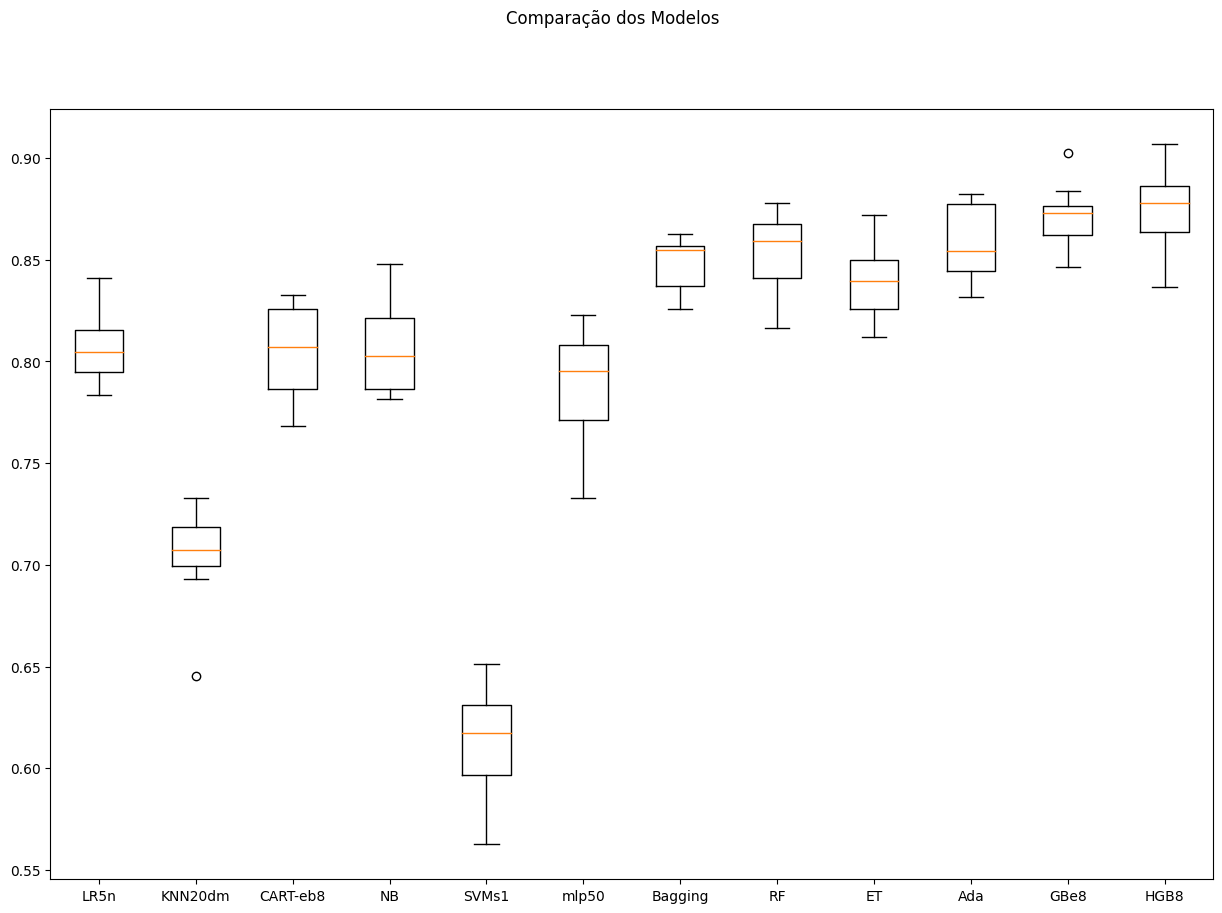

In [323]:
# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 6.2 Visualizando as curvas ROC de cada modelo

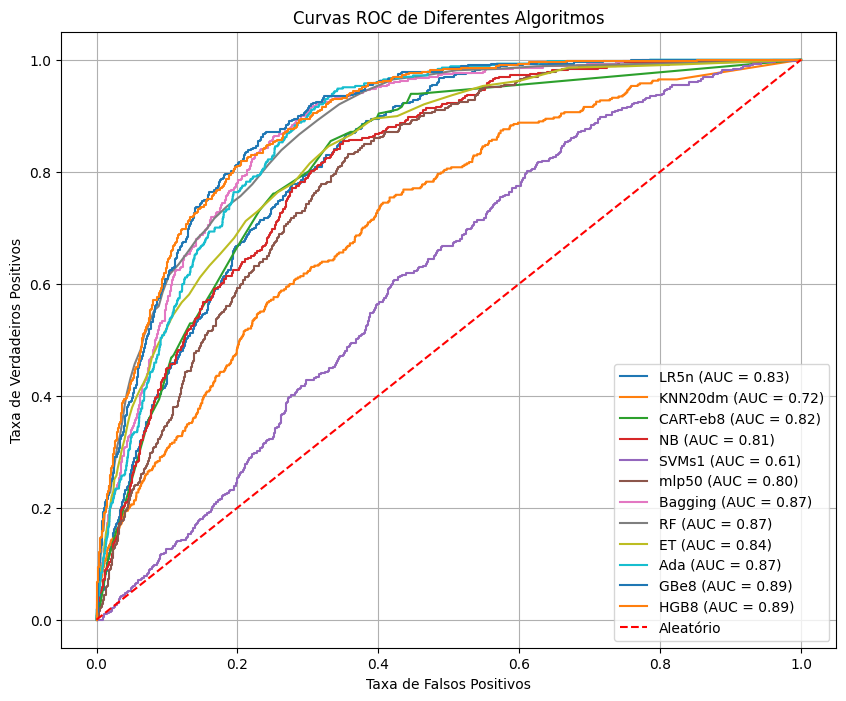

In [324]:
# Criando o gráfico ROC para cada modelo
plt.figure(figsize=(10, 8))
for name, model in models:
    model.fit(X_treino, y_treino)

    # Verificando se o modelo tem o método predict_proba
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_teste)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_teste)
    else:
        raise AttributeError("O modelo não tem os métodos necessários para calcular as probabilidades.")

    fpr, tpr, _ = roc_curve(y_teste, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plotando a linha diagonal (aleatório)
plt.plot([0, 1], [0, 1], "r--", label="Aleatório")

# Configurações do gráfico
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curvas ROC de Diferentes Algoritmos")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### 6.3 Conclusão e seleção do modelo vencedor

O algoritmo que apresentou o melhor desempenho nas configurações estabelecidas e segundo a métrica de área sob a curva ROC foi o **HistGradientBoostingClassifier**, que é um ensemble do tipo boosting, sequencial. Ele usa histogramas para computar os gradientes das funções de perda, o que torna o treinamento mais rápido, especialmente para conjuntos de dados grandes.

É importante também notar que essa comparação de desempenho foi feita com os dados ainda sem nenhuma aplicação de padronização ou normalização.

## 7 Otimização dos hiperparâmetros

Neste bloco utilizarei a técnica de GridSearch para encontrar valores de hiperparâmetros que otimizem o algoritmo selecionado. Farei uso da classe Pipeline para instanciar diferentes configurações do conjunto de dados, aplicando padronização e normalização.

In [325]:
# Tuning do RN
pipelines = []

# Definindo os componentes do pipeline
hgbc = ('HGBC', HistGradientBoostingClassifier(random_state=seed))

#instanciando objetos para padronização e normalização
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

#criando pipelines com os dados sem modificações, com padronização e com normalização
pipelines.append(('hgbc-orig', Pipeline(steps=[hgbc])))
pipelines.append(('hgbc-padr', Pipeline(steps=[standard_scaler, hgbc])))
pipelines.append(('hgbc-norm', Pipeline(steps=[min_max_scaler, hgbc])))

# Como a instância de HistGradientBoostingClassifier usada na seção anterior já
# teve o hiperparâmetro max_depth definido com valor 8, vou necessariamente
# incluir esse parâmetro no grid considerando esse valor como uma das opções

# esse trecho de código abaixo, comentado, inclui configurações iniciais de
# hiperparâmetros que utilizei, onde busquei compreender o comportamento do
# algoritmo para posteriormente preparar um param_grid a ser usado na execução
# final.
'''
param_grid = {
    'HGBC__learning_rate': [0.01, 0.1, 0.5, 1],
    'HGBC__max_iter': [70, 100, 130],
    'HGBC__max_depth': [6, 8, 10],
    'HGBC__l2_regularization': [0, 1],
}
hgbc-orig - Melhor: 0.879235 usando {'HGBC__l2_regularization': 1, 'HGBC__learning_rate': 0.1, 'HGBC__max_depth': 10, 'HGBC__max_iter': 130}
hgbc-padr - Melhor: 0.879235 usando {'HGBC__l2_regularization': 1, 'HGBC__learning_rate': 0.1, 'HGBC__max_depth': 10, 'HGBC__max_iter': 130}
hgbc-norm - Melhor: 0.879235 usando {'HGBC__l2_regularization': 1, 'HGBC__learning_rate': 0.1, 'HGBC__max_depth': 10, 'HGBC__max_iter': 130}
'''

# Como os valores de hiperparâmetros informados como ótimos foram iguais em
# todos os casos, eu procurei identificar os caminhos que o gridsearch buscou,
# para tomar decisões para as tentativas seguintes. Por exemplo, para
# l2_regularization o melhor valor entre 0 e 1 foi 1. No próximo grid eu
# experimentei 1 e 2.

'''
param_grid = {
    'HGBC__max_iter': [130, 150, 180],
    'HGBC__max_depth': [10, 13, 16],
    'HGBC__l2_regularization': [1,2],
}
hgbc-orig - Melhor: 0.880294 usando {'HGBC__l2_regularization': 2, 'HGBC__max_depth': 13, 'HGBC__max_iter': 150}
hgbc-padr - Melhor: 0.880294 usando {'HGBC__l2_regularization': 2, 'HGBC__max_depth': 13, 'HGBC__max_iter': 150}
hgbc-norm - Melhor: 0.880294 usando {'HGBC__l2_regularization': 2, 'HGBC__max_depth': 13, 'HGBC__max_iter': 150}
'''

# finalizo minhas experimentações então com o param_grid abaixo
param_grid = {
    'HGBC__max_iter': [140, 150, 160],
    'HGBC__max_depth': [12, 13, 14],
    'HGBC__l2_regularization': [2,3],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_treino, y_treino)
    # imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

hgbc-orig - Melhor: 0.878848 usando {'HGBC__l2_regularization': 3, 'HGBC__max_depth': 13, 'HGBC__max_iter': 140}
hgbc-padr - Melhor: 0.878849 usando {'HGBC__l2_regularization': 3, 'HGBC__max_depth': 13, 'HGBC__max_iter': 140}
hgbc-norm - Melhor: 0.878848 usando {'HGBC__l2_regularization': 3, 'HGBC__max_depth': 13, 'HGBC__max_iter': 140}


O modelo com melhor desempenho segundo o critério de **área sob a curva ROC** foi aquele gerado com **HistGradientBoostingClassifier** com parâmetros **l2_regularization com valor 3**, **max_depth com valor 13** e **max_iter com valor 140**, considerando os hiperparâmetros selecionados e a quantidade de tentativas de obtenção de melhores resultados executada.

Notem que o resultado da execução do gridsearch é praticamente igual em todos os casos, com uma pequena diferença na métrica no cenário de dados padronizados. Vou ignorar essa diferença e considerar o cenário de dados sem padronização ou normalização como o vencedor, para poupar etapas de tratamento de dados mais adiante, que seriam necessárias se eu escolhesse o conjunto de dados padronizado ou o normalizado.

## 8 Finalização do Modelo

Após a seleção do algoritmo e dos seus hiperparâmetros, posso agora finalizar o modelo.

Vou agora treinar em todo o conjunto de dados de treinamento (sem validação cruzada), e farei predições para o conjunto de dados de teste que foi separado no início, a fim de confirmarmos os resultados. Não farei padronização nem normalização dos dados visto que não trouxeram melhoria na métrica segundo os resultados da aplicação do gridsearch.

In [326]:
# Avaliação do modelo com o conjunto de testes

#hiperparametros selecionados
l2_regularization_def=3
max_depth_def=13
max_iter_def=140

# Preparação do modelo
model = HistGradientBoostingClassifier(max_iter=max_iter_def, max_depth=max_depth_def, l2_regularization=l2_regularization_def, random_state=seed)
model.fit(X_treino, y_treino)

# Estimativa da precisão no conjunto de teste
y_probabilidades = model.predict_proba(X_teste)[:, 1]  # Probabilidade da classe positiva

# Avaliação do modelo
# Calcular a área sob a curva ROC
roc_auc = roc_auc_score(y_teste, y_probabilidades)
print("ROC AUC:", roc_auc)

ROC AUC: 0.8885961935583989


Ao preparar o modelo usando toda a base de treinamento e calcular a métrica de precisão usando a base de testes, podemos ver que o resultado ficou ainda melhor do que aquele obtido nas etapas anteriores. Saí de uma precisão de aproximadamente 0.875 no treinamento inicial ainda sem otimização de hiperparâmetros para uma precisão de 0.889 na etapa final. Isso demostra que **não aconteceu overfitting** durante o treinamento pois os valores estão no mesmo patamar. Se tivesse acontecido overfitting durante o treinamento, o resultado da métrica seria pior ao testar com a base de testes.

Vou agora preparar o modelo para utilização em produção. Para isso, vou treiná-lo com todo o dataset, e não apenas com o conjunto de treino.

In [327]:
# Preparação do modelo com TODO o dataset
model.fit(X, y)

HistGradientBoostingClassifier(l2_regularization=3, max_depth=13, max_iter=140,
                               random_state=7)

## 9 Interpretação do modelo

Incluo este último trecho de código para verificarmos dados sobre a importância dos atributos, permitindo assim uma melhor interpretação do modelo. Escolhi a técnica de permutação de importância de atributos pois estava tendo problemas com outras abordagens na versão do scikit-learn presente neste notebook.

In [328]:
# Calculando a permutação de importância de atributos
result = permutation_importance(model, X, y, n_repeats=10, random_state=seed)

# Ordenando os índices dos atributos pela importância média
sorted_idx = result.importances_mean.argsort()

Visualizando o resultado usando um gráfico de barras horizontais.

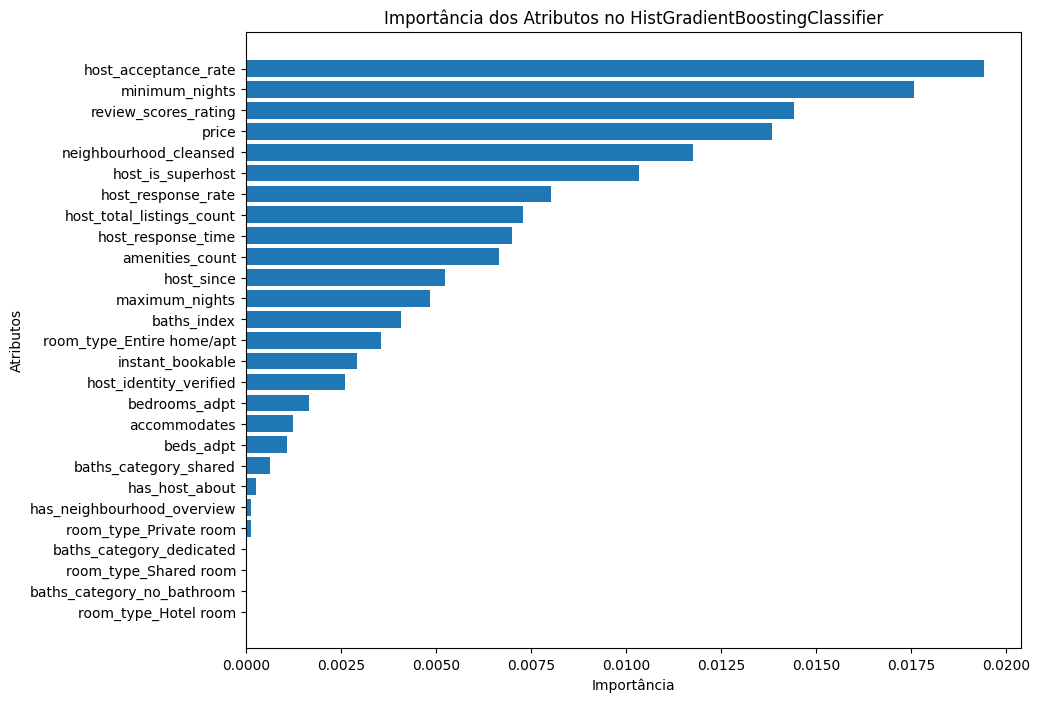

In [329]:
# Criando um gráfico de barras para visualizar a importância dos atributos
plt.figure(figsize=(10, 8))
plt.barh(range(X.shape[1]), result.importances_mean[sorted_idx], align="center")
plt.yticks(range(X.shape[1]), np.array(X.columns)[sorted_idx])
plt.ylabel("Atributos")
plt.xlabel("Importância")
plt.title("Importância dos Atributos no HistGradientBoostingClassifier")
plt.show()

Podemos observar no gráfico acima uma medida relativa de quanto cada atributo é importante para o desempenho do modelo. Valores de importância mais altos indicam atributos que tem maior poder na capacidade do modelo de fazer previsões precisas. Se removidos, afeteriam mais significativamente a capacidade do modelo.

É importante notar que os valores não indicam a direção da relação, ou seja, não indicam se valores maiores levariam a um resultado positivo ou negativo da variável alvo.

Se quisermos observar os 5 atributos de maior importância para o modelo treinado neste trabalho, podemos dizer que a **taxa de aceitação de reservas** por parte do anfitrião, o **número mínimo de noites para uma reserva**, a **avaliação da acomodação** segundo notas dadas pelos hóspedes, o **preço** atrelado à acomodação e o **bairro** onde ela se localiza são os atributos mais importantes para o melhor desempenho do modelo em classificar de acordo com a variável alvo que escolhemos.

Um último trecho de código para restaurar configurações padrão.

In [330]:
# Restaurando configurações padrão
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

## 10 Conclusão

Fiz esse trabalho como parte dos compromissos de avaliação da especialização em ciência de dados e analytics, da PUC Rio, no sprint relacionado ao tema de Machine Learning. No entanto, muito mais do que buscar a nota necessária para a aprovação, eu procurei explorar as possibilidades oferecidas na aplicação de técnicas de machine learning. Essa etapa é talvez a mais divertida e passível de diferentes experimentações num projeto de ciência de dados então todo conhecimento adquirido vai ser muito útil para desafios futuros. Logo abaixo eu enumero meus aprendizados e as conclusões pertinentes, organizados por tópicos.

### Conclusões primárias diretas

*   Para uma acomodação de Airbnb na cidade do Rio de Janeiro estar entre as 10% melhores em termos de quantidade de reviews nos últimos 12 meses, ela precisa conseguir pelos menos 32 reviews nesse período. Notem que isso é menos do que um review por semana já que um ano tem cerca de 52 semanas.
*   É possível inferirmos com um bom grau de sucesso quando uma acomodação vai pertencer ao grupo dos 10% usando um algoritmo supervisionado de machine learning fazendo o treinamento com o dataset disponibilizado. Este trabalho concluiu que o melhor algoritmo no contexto adotado neste trabalho foi o HistGradientBoostingClassifier.
*   Existe um conjunto de atributos que são mais influentes no desempenho do modelo e se considerarmos os 5 mais importantes podemos listar: taxa de aceitação de reservas, número mínimo de noites, avaliação da acomodação, preço e bairro. Vale destacar que a grande parte destes atributos são passíveis de mudança por parte do anfitrião, estando sob seu controle.

### 10.1 Regressão versus Classificação

Inicialmente eu estava adotando uma estratégia de trabalhar com algoritmos de regressão para inferir o valor numérico de quantidade de reviews tratando esse atributo como a variável alvo. Fiz alguns testes iniciais obtendo resultados não satisfatórios em relação ao desempenho dos algoritmos testados. Preferi modificar o desafio tratando o problema como um problema de classificação para ter a oportunidade de aprender técnicas do contexto deste tipo de problema. Praticar as duas estratégias foi bom para aprender sobre ambas.

### 10.2 Reprodutibilidade

Durante o trabalho me deparei com resultados que se modificavam a cada execução. Tive que fazer uma revisão no uso de seeds e random states para garantir que os mesmos resultados fossem obtidos a cada execução do notebook.

### 10.2 Avaliação do modelo

Como experimentei inicialmente métodos de regressão e depois passei para classificação, pude exercitar diferentes técnicas de avaliação dos modelos que estava testando. Dentro da classificação, verifiquei a ineficiência de se usar precisão no dataset desbalanceado que é o meu caso e acabei adotando a área sob a curva ROC por ser uma métrica muito boa para problemas de classificação binária em datasets desbalanceados.

### 10.3 Limpeza, tratamento e transformação de dados

Aproveitei boa parte das ações de limpeza, tratamento e transformação dos dados que já havia feito no MVP do sprint anterior. Neste notebook, pude indicar corretamente que se tratava de seleção de atributos de maneira não supervisionada já que os atributos foram eliminados sem levar em conta a variável alvo. Não apliquei nenhum técnica de seleção de atributos supervisionada de maneira explícita deixando os próprios algoritmos fazerem isso de acordo com as regras de funcionamento internas deles ou de acordo com hiperparâmetros que indiquei ao instanciá-los.

### 10.4 Visualização de dados

Apliquei técnicas de visualização de dados de maneira pontual, para mostrar a evolução do dataset ao longo das etapas de limpeza de dados e também em ocasiões selecionadas, como quando apresentei o resultado da análise de importância dos atributos.

### 10.5 Pair programming com chatGPT, Gemini e Perplexity

No MVP do sprint anterior eu fiz uso do chatGPT para tirar algumas dúvidas e para gerar alguns trechos de código que depois modifiquei de acordo com minhas necessidades. Neste MVP, ampliei o leque de ferramentas de IA generativa usando também o Gemini do Google e o Perplexity, muitas vezes comparando respostas dadas por esses diferentes serviços e adaptando-as para os meus cenários de uso. Me deparei com alguns problemas relacionados à versão do scikit-learn, com códigos gerados pelas IAs não sendo condizentes com a versão instalada no Google Colab.



## 11 Pontos em aberto e melhorias

Criei essa seção para enumerar pontos em aberto e possibilidades de melhoria e evolução do trabalho. Seguem algumas sugestões:

*   comparei o resultado de algumas algoritmos de classificação nas suas configurações padrão. Com recursos mais abundantes e com mais tempo disponível, seria possível executar GridSearch variando parâmetros dos diversos algoritmos e não apenas daquele que foi selecionado numa primeira análise comparativa.

*   os modelos de classificação foram avaliados considerando-se todo o conjunto de atributos. Um trabalho adicional interessante seria fazer uma modelagem que considerasse uma segregação dos atributos, separando-os por exemplo entre atributos que indiquem propriedades diretas das acomodações (diretamente relacionadas às características físicas do imóvel) e atributos que indiquem valores passíveis de configuração ou comportamento do anfitrião. A métrica de precisão nos modelos de classificação ficaria melhor ou pior ao fazermos essa segregação de atributos? Olhar para esse resultado considerando apenas características físicas da acomodação pode talvez ajudar no processo de decisão de uma pessoa que está querendo investir em acomodações para aluguel por temporada.

* O espaço que dediquei para explorar a interpretabilidade do modelo pode ser melhorado, incluindo informações sobre valores e direção para a classificação inferida. Montar e desenhar uma árvore de decisão incluindo os valores usados para decisão em cada nó vai ajudar bastante na interpretação do processo decisório interno do modelo e na interpretação da importância dos atributos.

* Assim como no MVP anterior, o trabalho não foi implementado de maneira a ser utilizável para datasets com dados de Airbnb de outras cidades do mundo. Uma melhoria possível nesta trabalho seria revisá-lo de modo a torná-lo genérico para datasets de outras cidades onde o Airbnb opera.

* Decidi usar o mesmo dataset do MVP anterior, com dados sobre acomodações no ano de 2023. Já saiu uma versão nova do dataset considerando dados de 2024. Portanto, uma melhoria possível seria revisar essa versão e usá-la para que sejam considerados dados mais atualizados na hora de treinar e testar o modelo.



